<a href="https://colab.research.google.com/github/GeniusJr001/MachIne_learning/blob/main/Recommedation_system_for_tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_USA (1).csv to cleaned_data_USA (1) (1).csv


In [ ]:
dataset = pd.read_csv('cleaned_data_USA (1).csv')
dataset.head()

,Unnamed: 0,name,main_category,rating,reviews,categories,address,city,country,state,zipcode,broader_category,Weighted_Score,Weighted_Average,All_Cities
0,0,Forsyth Park,Park,4.8,16538.0,"Park, Tourist attraction","Forsyth Park, Savannah, GA 31401",Savannah,USA,GA,NaN,Nature,79382.4,4.67,"Atlanta, Augusta, Chattanooga, Savannah"
1,1,The Cathedral Basilica of St. John the Baptist,Catholic cathedral,4.8,5911.0,"Catholic cathedral, Catholic church, Tourist a...",The Cathedral Basilica of St. John the Baptist...,Savannah,USA,GA,NaN,Religious,28372.8,4.80,"Atlanta, Augusta, Chattanooga, Savannah"
2,2,Fort Pulaski National Monument,Monument,4.8,5221.0,"Monument, Historical place, Historical landmar...","Fort Pulaski National Monument, 101 Fort Pulas...",Savannah,USA,GA,NaN,Cultural,25060.8,4.53,"Atlanta, Augusta, Chattanooga, Savannah"
3,3,Fountain at Forsyth Park,Historical landmark,4.8,4234.0,"Historical landmark, Tourist attraction","Fountain at Forsyth Park, 1 W Gaston St, Savan...",Savannah,USA,GA,NaN,Cultural,20323.2,4.53,"Atlanta, Augusta, Chattanooga, Savannah"
4,4,Wormsloe State Historic Site,Historical place museum,4.5,3615.0,"Historical place museum, Museum, Park, State park","Wormsloe State Historic Site, 7601 Skidaway Rd...",Savannah,USA,GA,NaN,Cultural,16267.5,4.53,"Atlanta, Augusta, Chattanooga, Savannah"


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (1).csv


# **PREPROCESSING**

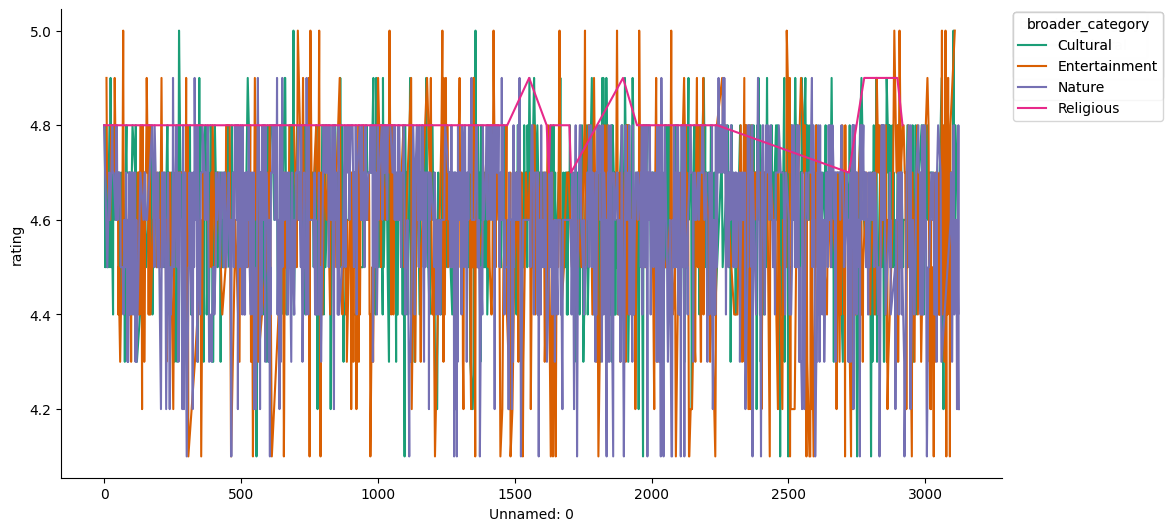

In [ ]:
# @title Unnamed vs rating

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['rating']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('broader_category')):
  _plot_series(series, series_name, i)
  fig.legend(title='broader_category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('rating')

In [ ]:
# prompt: plot the statistical analysis for this dataset

# Assuming 'dataset' is already loaded and preprocessed as per the preceding code

# Generate descriptive statistics
descriptive_stats = dataset.describe()
print(descriptive_stats)

# Plot histograms for numerical columns
dataset.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Plot box plots for numerical columns to visualize distribution and outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# If you have categorical columns, you might want to plot value counts
for col in dataset.select_dtypes(include='object').columns:
  plt.figure(figsize=(8, 5))
  dataset[col].value_counts().plot(kind='bar')
  plt.title(f'Value Counts for {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

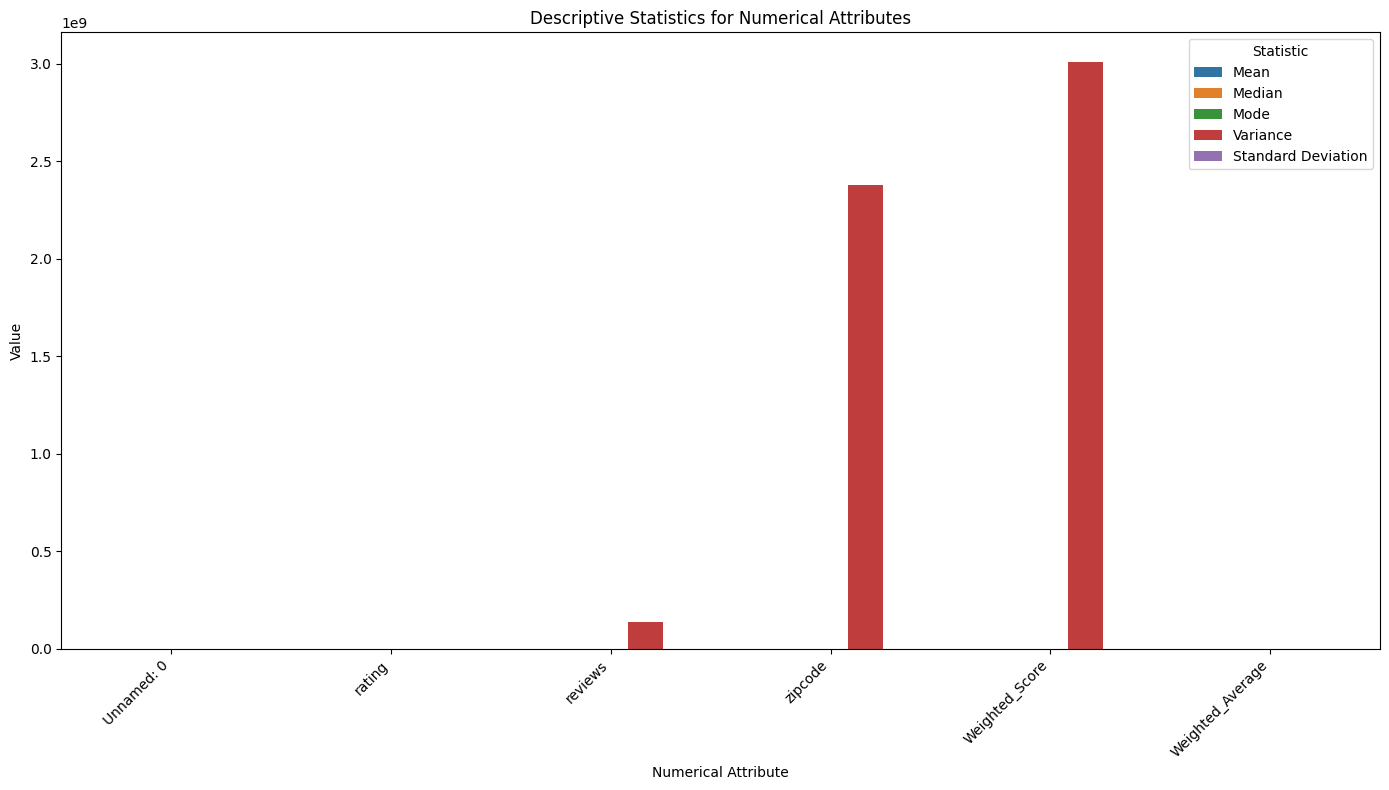

In [ ]:
# prompt: plot a single diagram for the mean, median, mode, variance, and standard deviation for numerical attributes

# Get numerical columns
numerical_cols = dataset.select_dtypes(include=np.number).columns

# Calculate statistics for each numerical column
stats_data = {}
for col in numerical_cols:
  stats_data[col] = {
      'Mean': dataset[col].mean(),
      'Median': dataset[col].median(),
      'Mode': dataset[col].mode()[0] if not dataset[col].mode().empty else np.nan, # Mode might return multiple values
      'Variance': dataset[col].var(),
      'Standard Deviation': dataset[col].std()
  }

stats_df = pd.DataFrame(stats_data).T # Transpose for easier plotting

# Plotting
plt.figure(figsize=(14, 8))

# Melt the DataFrame to long format for easier plotting with seaborn
stats_melted = stats_df.reset_index().melt(id_vars='index', var_name='Statistic', value_name='Value')

# Plotting the grouped bar chart
sns.barplot(x='index', y='Value', hue='Statistic', data=stats_melted)

plt.title('Descriptive Statistics for Numerical Attributes')
plt.xlabel('Numerical Attribute')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

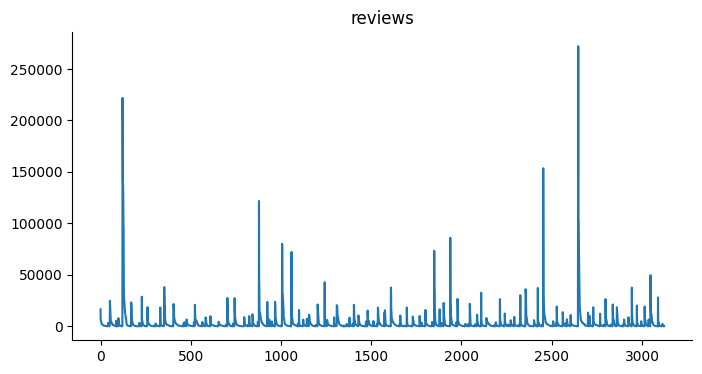

In [ ]:
# @title reviews

from matplotlib import pyplot as plt
dataset['reviews'].plot(kind='line', figsize=(8, 4), title='reviews')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
booking_dataset = pd.read_csv('hotel_bookings.csv')
booking_dataset.tail()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17
119389,119389,City Hotel,0,205,2017,August,35,29,2,7,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-17


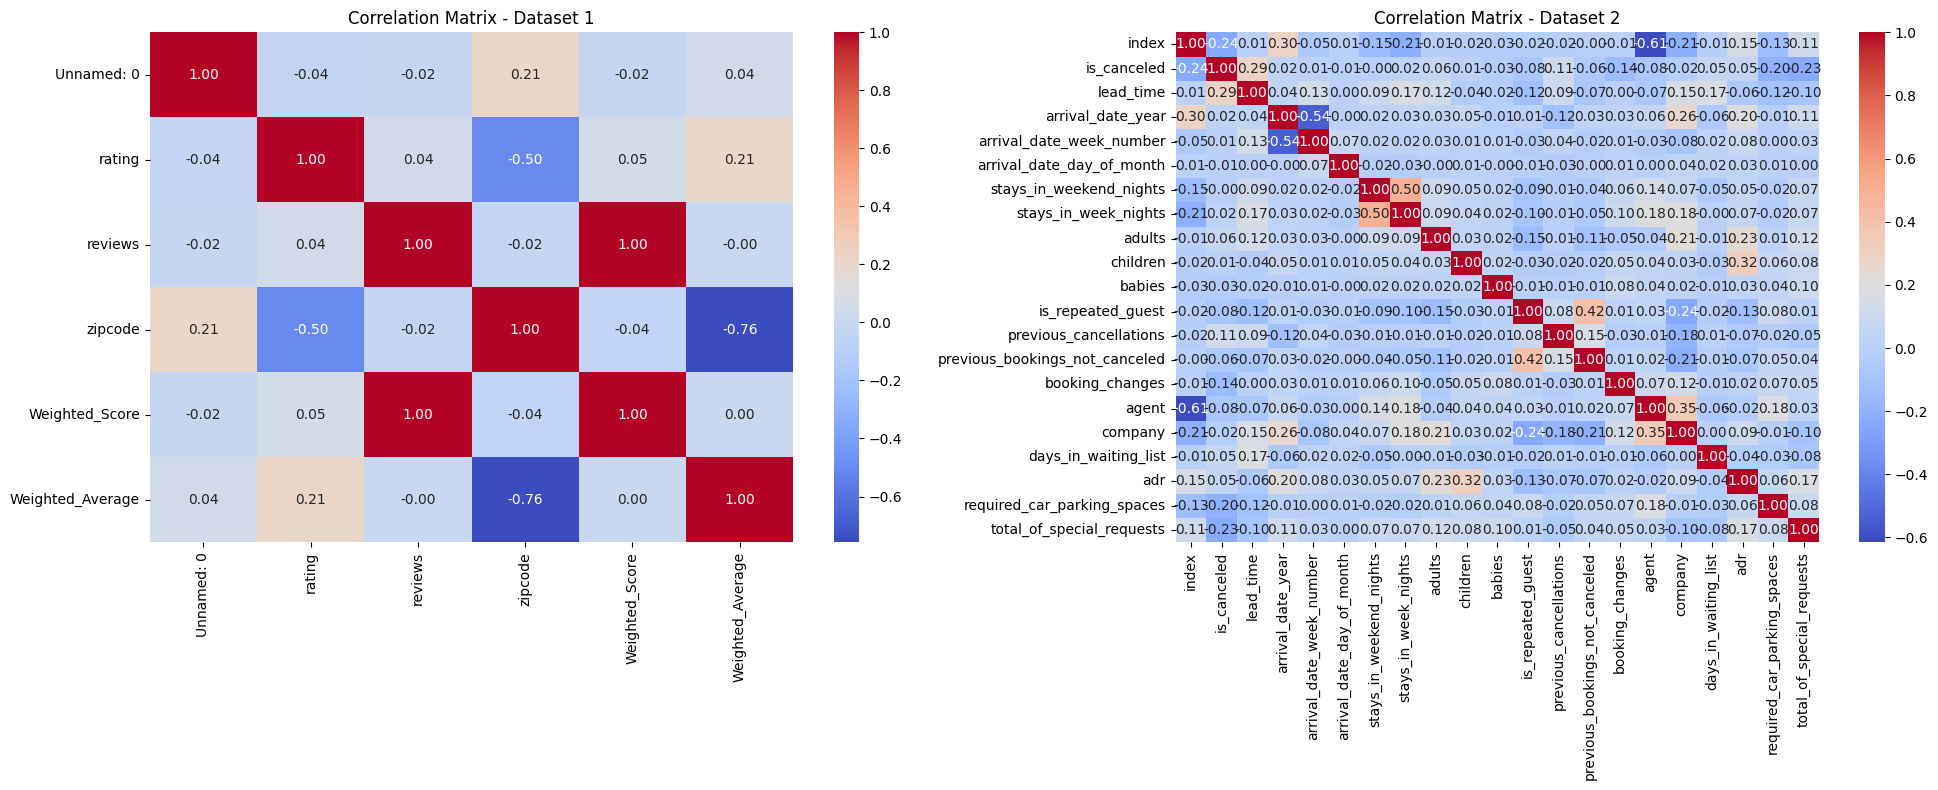

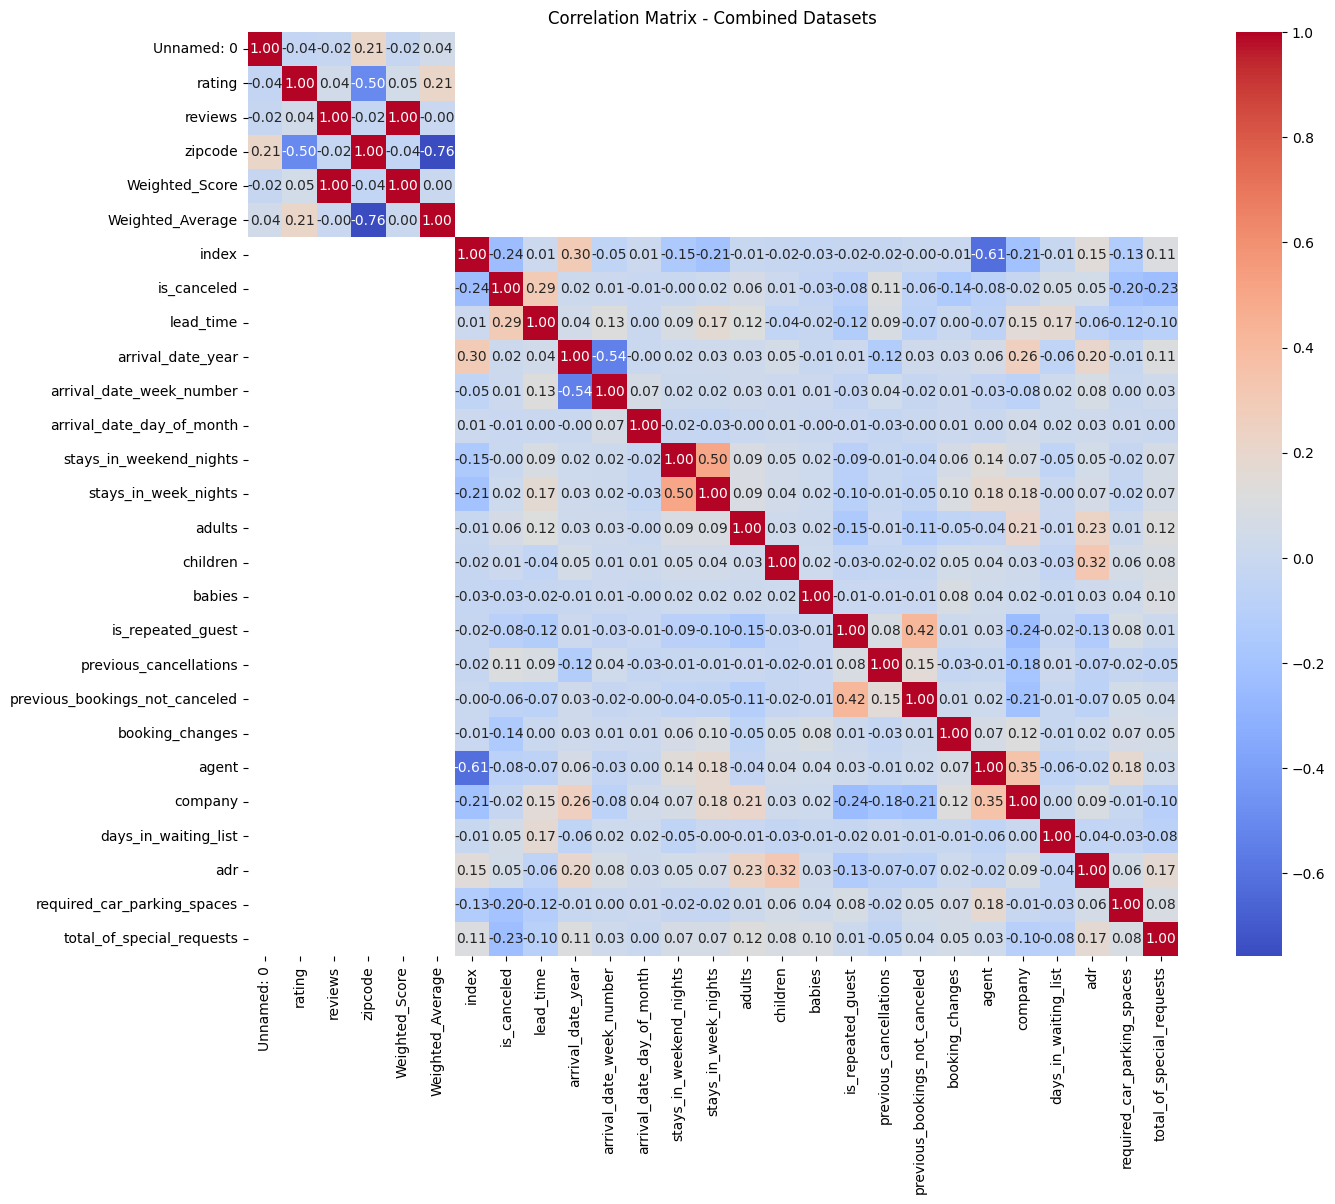

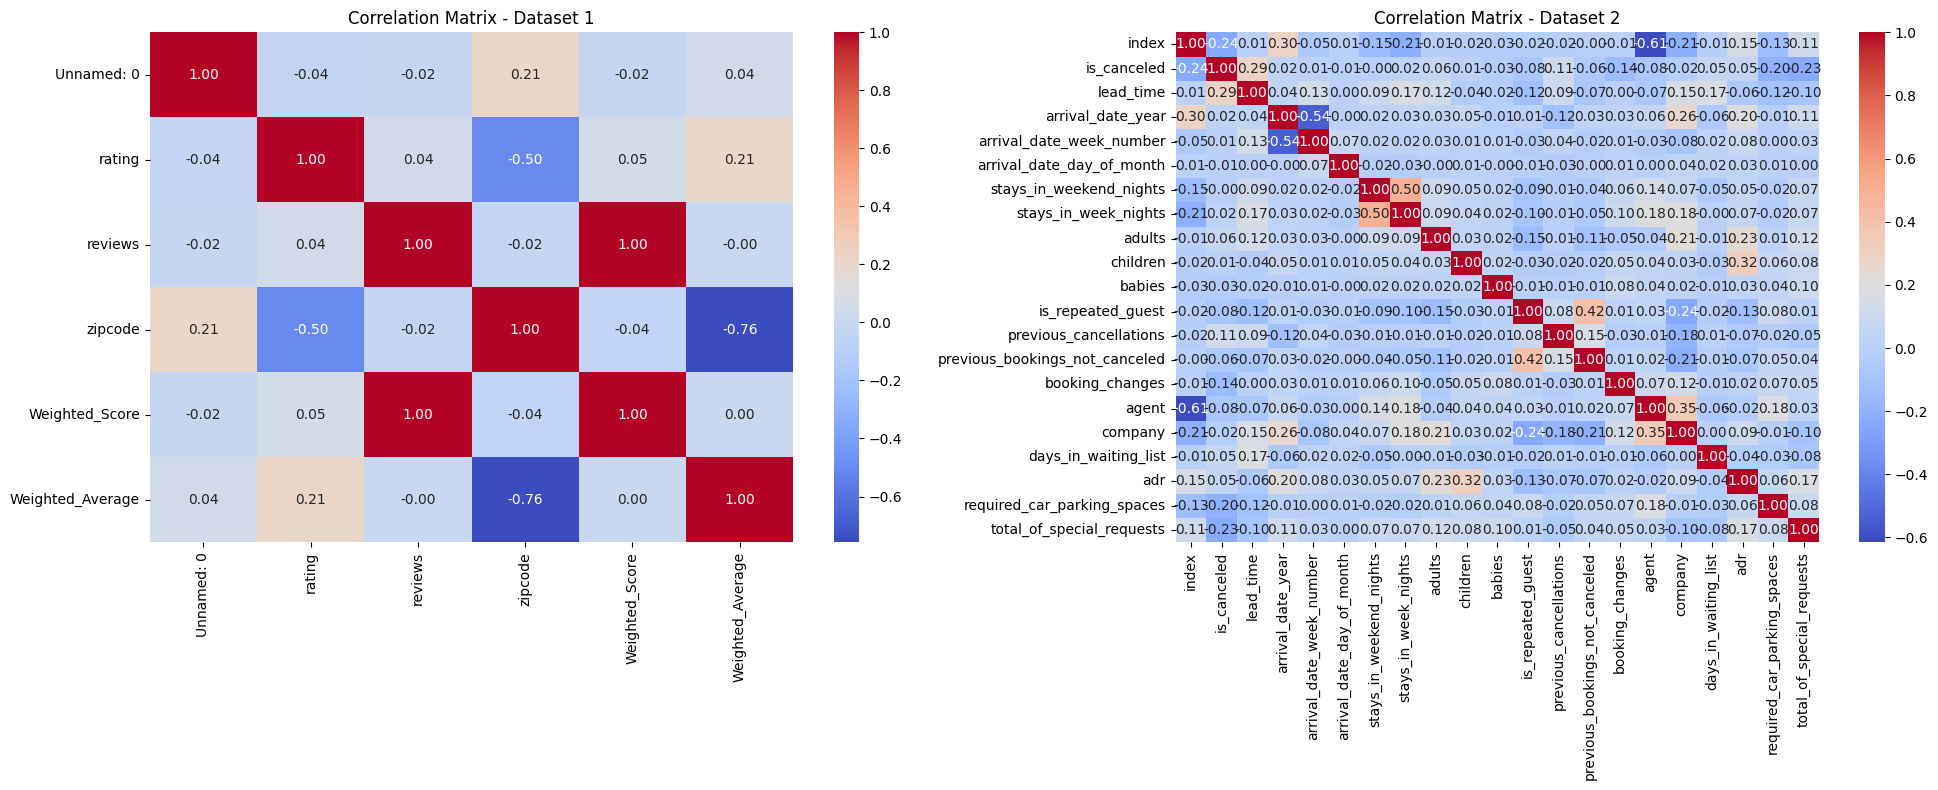

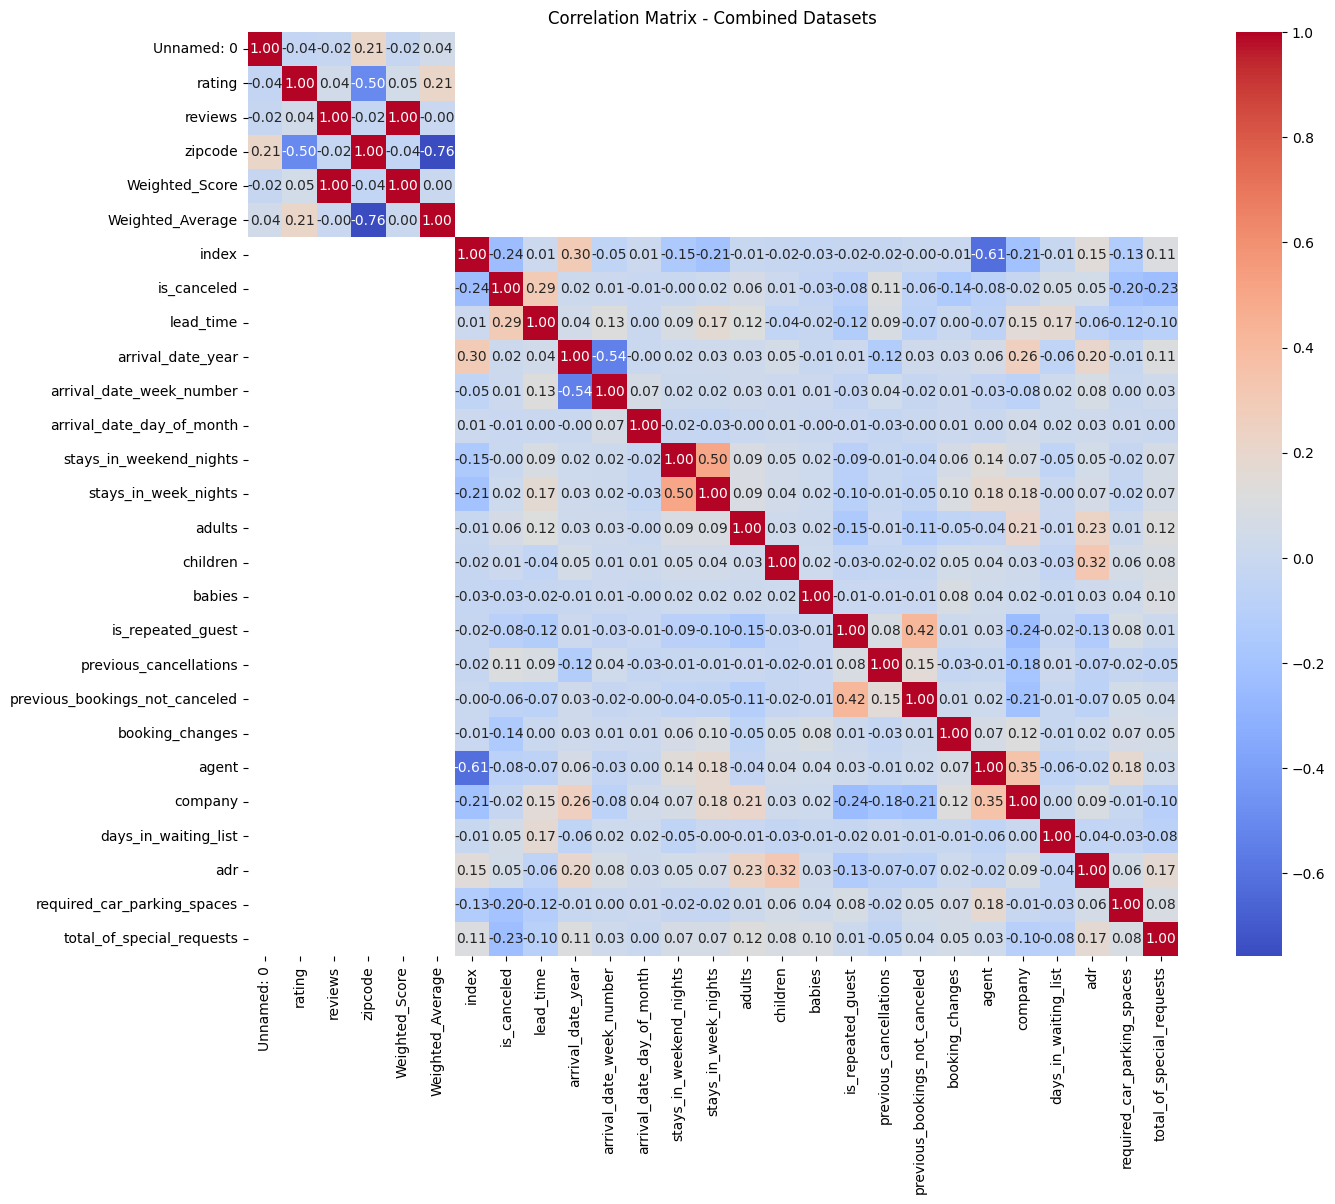

In [ ]:
# prompt: combine and plot the heat map of both dataset

# Assume `dataset` is your first dataset and `booking_dataset` is your second dataset, both loaded from previous steps.

# Select only numeric columns for heatmap
numeric_dataset = dataset.select_dtypes(include=np.number)
numeric_booking_dataset = booking_dataset.select_dtypes(include=np.number)

# Combine the two datasets. We'll concatenate them row-wise and calculate the correlation matrix for the combined data.
# Be mindful of potential differences in columns. You might need to align columns if necessary.
# For this example, we'll assume relevant numeric columns with the same name exist in both datasets or
# we are interested in the correlation across all numeric features present in either dataset.
# A simple concatenation might not be appropriate if the datasets represent different entities or timestamps.
# A better approach for showing heatmaps of two separate datasets might be to plot them side-by-side or plot their individual correlation matrices.

# Option 1: Plot individual heatmaps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for the first dataset
correlation_matrix_dataset = numeric_dataset.corr()
sns.heatmap(correlation_matrix_dataset, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix - Dataset 1')

# Heatmap for the second dataset
correlation_matrix_booking = numeric_booking_dataset.corr()
sns.heatmap(correlation_matrix_booking, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix - Dataset 2')

plt.tight_layout()
plt.show()

# Option 2: If you want to see the correlation across ALL numeric columns from BOTH datasets
# (This might result in a larger heatmap with many NaNs if columns don't overlap)
combined_numeric_data = pd.concat([numeric_dataset, numeric_booking_dataset], axis=0)
correlation_matrix_combined = combined_numeric_data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Combined Datasets')
plt.show()

# prompt: combine and plot the heat map of both dataset

# Assume `dataset` is your first dataset and `booking_dataset` is your second dataset, both loaded from previous steps.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Select only numeric columns for heatmap
numeric_dataset = dataset.select_dtypes(include=np.number)
numeric_booking_dataset = booking_dataset.select_dtypes(include=np.number)

# Combine the two datasets. We'll concatenate them row-wise and calculate the correlation matrix for the combined data.
# Be mindful of potential differences in columns. You might need to align columns if necessary.
# For this example, we'll assume relevant numeric columns with the same name exist in both datasets or
# we are interested in the correlation across all numeric features present in either dataset.
# A simple concatenation might not be appropriate if the datasets represent different entities or timestamps.
# A better approach for showing heatmaps of two separate datasets might be to plot them side-by-side or plot their individual correlation matrices.

# Option 1: Plot individual heatmaps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for the first dataset
correlation_matrix_dataset = numeric_dataset.corr()
sns.heatmap(correlation_matrix_dataset, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix - Dataset 1')

# Heatmap for the second dataset
correlation_matrix_booking = numeric_booking_dataset.corr()
sns.heatmap(correlation_matrix_booking, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix - Dataset 2')

plt.tight_layout()
plt.show()

# Option 2: If you want to see the correlation across ALL numeric columns from BOTH datasets
# (This might result in a larger heatmap with many NaNs if columns don't overlap)
combined_numeric_data = pd.concat([numeric_dataset, numeric_booking_dataset], axis=0)
correlation_matrix_combined = combined_numeric_data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Combined Datasets')
plt.show()

# Choose the option that best suits your visualization goal.
# Option 1 is generally better for comparing the correlation structures of two distinct datasets.

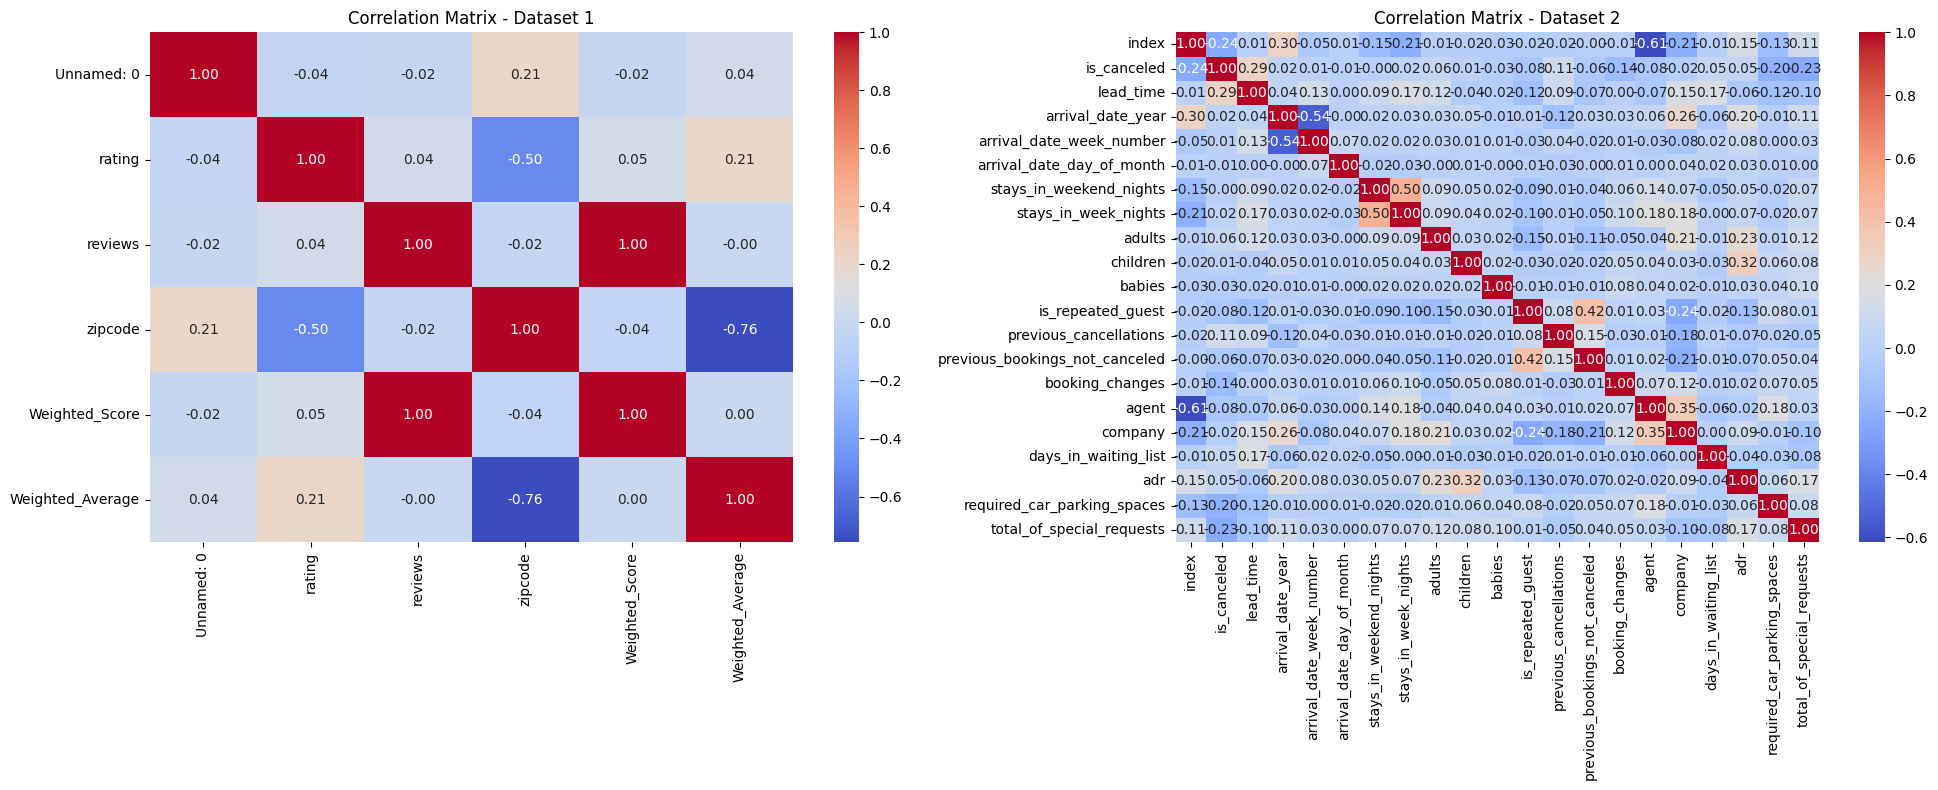

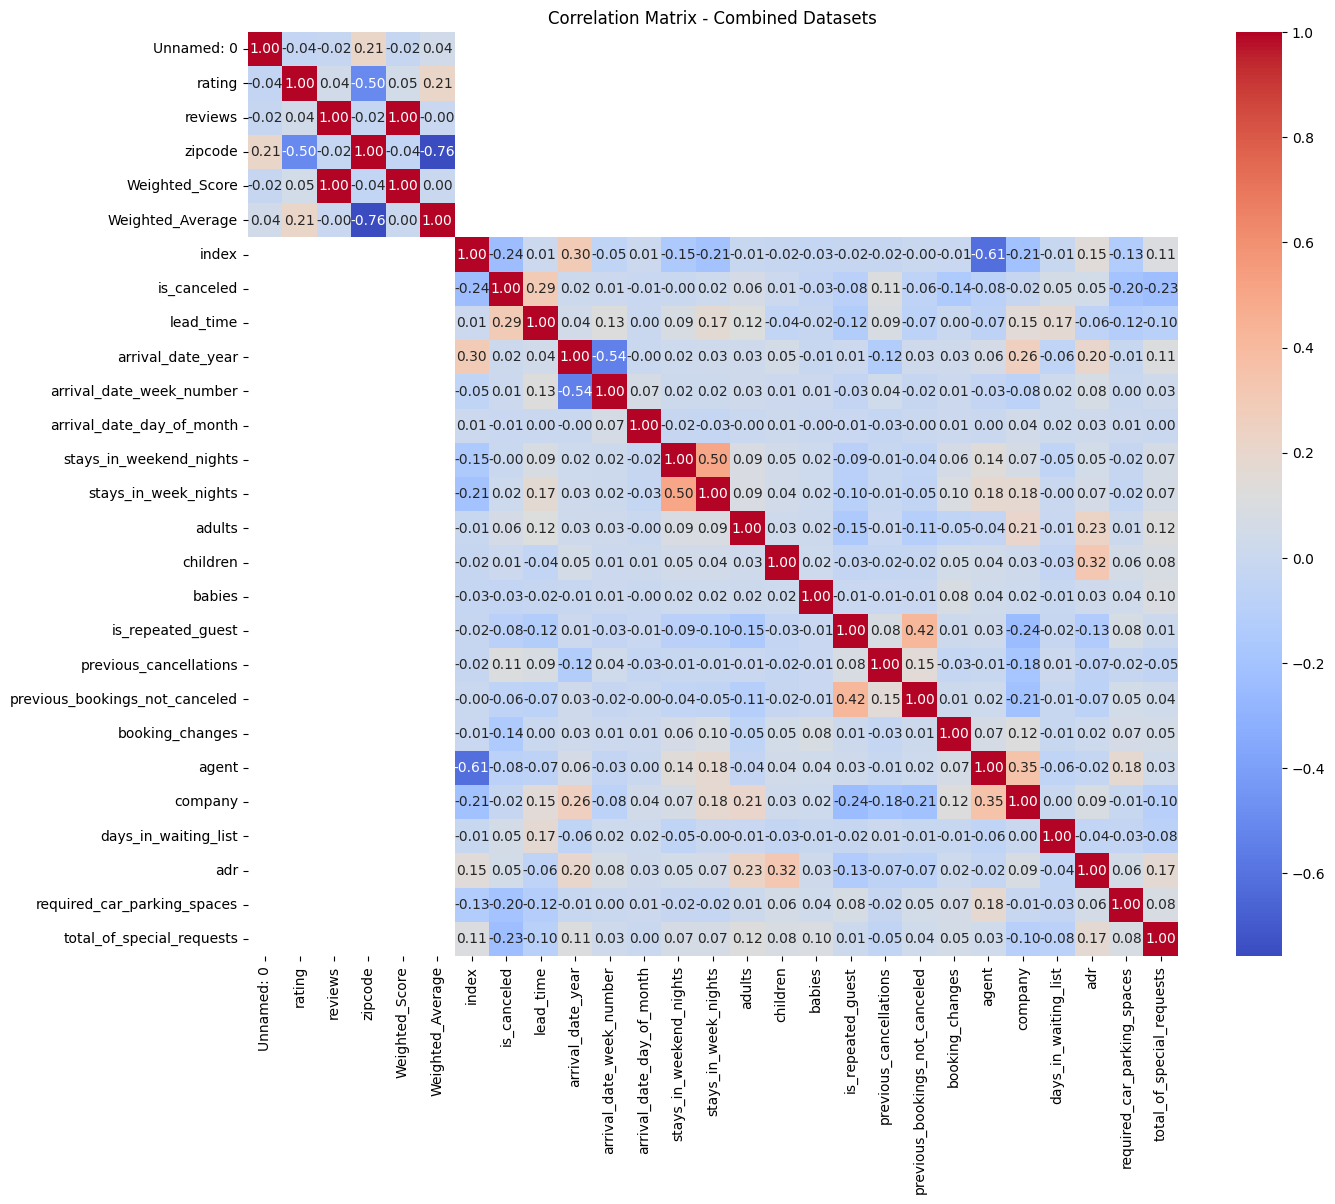

In [ ]:
# Assume `dataset` is your first dataset and `booking_dataset` is your second dataset, both loaded from previous steps.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the booking dataset (Ensure this cell is executed before using booking_dataset)
booking_dataset = pd.read_csv('hotel_bookings.csv')

# Select only numeric columns for heatmap
numeric_dataset = dataset.select_dtypes(include=np.number)
numeric_booking_dataset = booking_dataset.select_dtypes(include=np.number)

# Combine the two datasets. We'll concatenate them row-wise and calculate the correlation matrix for the combined data.
# Be mindful of potential differences in columns. You might need to align columns if necessary.
# For this example, we'll assume relevant numeric columns with the same name exist in both datasets or
# we are interested in the correlation across all numeric features present in either dataset.
# A simple concatenation might not be appropriate if the datasets represent different entities or timestamps.
# A better approach for showing heatmaps of two separate datasets might be to plot them side-by-side or plot their individual correlation matrices.

# Option 1: Plot individual heatmaps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for the first dataset
correlation_matrix_dataset = numeric_dataset.corr()
sns.heatmap(correlation_matrix_dataset, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix - Dataset 1')

# Heatmap for the second dataset
correlation_matrix_booking = numeric_booking_dataset.corr()
sns.heatmap(correlation_matrix_booking, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix - Dataset 2')

plt.tight_layout()
plt.show()

# Option 2: If you want to see the correlation across ALL numeric columns from BOTH datasets
# (This might result in a larger heatmap with many NaNs if columns don't overlap)
combined_numeric_data = pd.concat([numeric_dataset, numeric_booking_dataset], axis=0)
correlation_matrix_combined = combined_numeric_data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Combined Datasets')
plt.show()

In [ ]:
!pip install -q geopandas shapely folium plotly_express

In [ ]:
# Assume `dataset` is your first dataset and `booking_dataset` is your second dataset, both loaded from previous steps.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # Import plotly.express for geospatial plots

# Load the booking dataset (Ensure this cell is executed before using booking_dataset)
# This line is already in the notebook, ensure it's run before this cell
# booking_dataset = pd.read_csv('hotel_bookings.csv')

# --- Start of Geospatial Plotting ---

# Let's analyze the distribution of data points by country in each dataset

# Count occurrences per country in the booking dataset
if 'country' in booking_dataset.columns:
    booking_country_counts = booking_dataset['country'].value_counts().reset_index()
    booking_country_counts.columns = ['country', 'number_of_bookings']

    # Create a choropleth map for the booking dataset
    print("Plotting distribution of bookings by Country:")
    fig_bookings = px.choropleth(booking_country_counts,
                                 locations="country", # Column with country codes
                                 color="number_of_bookings", # Column with value to color the map
                                 hover_name="country", # Show country name on hover
                                 color_continuous_scale=px.colors.sequential.Plasma,
                                 title="Number of Hotel Bookings by Country")
    fig_bookings.show()
else:
    print("Booking dataset does not have a 'country' column for geospatial plotting.")


# Count occurrences per country in your dataset (assuming it has a 'country' column)
if 'country' in dataset.columns:
    # Check if 'dataset' contains country codes or names.
    # If it contains names, you might need to map them to codes.
    # Assuming 'dataset' also uses country codes for simplicity.
    attraction_country_counts = dataset['country'].value_counts().reset_index()
    attraction_country_counts.columns = ['country', 'number_of_attractions']

    # Create a choropleth map for the dataset
    print("Plotting distribution of attractions by Country:")
    fig_attractions = px.choropleth(attraction_country_counts,
                                    locations="country", # Column with country codes
                                    color="number_of_attractions", # Column with value to color the map
                                    hover_name="country", # Show country name on hover
                                    color_continuous_scale=px.colors.sequential.Viridis,
                                    title="Number of Attractions by Country")
    fig_attractions.show()
else:
     # If 'country' is not available, let's try plotting by 'city' if it exists in 'dataset'
     if 'city' in dataset.columns:
        print("Dataset does not have a 'country' column. Attempting to plot by city (requires geocoding).")
        print("Note: Plotting by city requires geocoding, which is more complex.")
        # You would need to add code here to geocode cities and plot points on a map
        # Example using plotly with city names (requires internet connection and can be less precise):
        # city_counts = dataset['city'].value_counts().reset_index()
        # city_counts.columns = ['city', 'number_of_attractions']
        # fig_cities = px.scatter_geo(city_counts, locations="city", locationmode="country names", # or 'country names' if cities are within one country
        #                             size="number_of_attractions", hover_name="city",
        #                             title="Number of Attractions by City (approximate)")
        # fig_cities.show()
     else:
        print("Dataset does not have 'country' or 'city' columns for geospatial plotting.")


# --- End of Geospatial Plotting ---

# The heatmap code has been replaced by the geospatial plotting code.
# You can remove or comment out the original heatmap code below.
# ... (Original heatmap code is no longer needed for geospatial plots) ...
# Select only numeric columns for heatmap
# numeric_dataset = dataset.select_dtypes(include=np.number)
# numeric_booking_dataset = booking_dataset.select_dtypes(include=np.number)
# ... and so on for the rest of the heatmap code.

Plotting distribution of bookings by Country:


Plotting distribution of attractions by Country:


In [ ]:
# Getting information about the columns in each DataFrame
print(booking_dataset.info())
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [ ]:
# Check unique values in `hotel` and `name` columns
unique_hotels = booking_dataset['hotel'].unique()
unique_names = dataset['name'].unique()

# Check the number of unique values in each column
if len(unique_hotels) > 50:
    # If there are too many unique values, sample the top 50
    top_hotels = booking_dataset['hotel'].value_counts().head(50).index.tolist()
    print(f"Top 50 hotels: {top_hotels}")
else:
    # Otherwise, print all unique values
    print(f"All hotels: {unique_hotels}")

if len(unique_names) > 50:
    # If there are too many unique values, sample the top 50
    top_names = dataset['name'].value_counts().head(50).index.tolist()
    print(f"Top 50 names: {top_names}")
else:
    # Otherwise, print all unique values
    print(f"All names: {unique_names}")

All hotels: ['Resort Hotel' 'City Hotel']
Top 50 names: ['Freedom Park', 'Urban Air Trampoline and Adventure Park', "Ripley's Believe It or Not!", 'Riverfront Park', 'Washington Park', 'Riverside Park', 'Veterans Park', 'Waterfront Park', 'Taste It Tours', 'Midtown Park', 'Central Park', 'Liberty Park', 'Washington Square', 'Flyover', 'Butterfly Wonderland', 'Commons Park', 'Veterans Memorial Park', 'Paul Bunyan Statue', 'Marshall Park', 'Riverwalk', 'Washington Square Park', 'The Grotto', 'Papago Park', 'Medieval Torture Museum', 'Hollywood Wax Museum', 'Centennial Park', 'Stinson Park', 'Heard Museum', 'Shakespeare Garden', 'Memorial Park', 'Bird Key Park', 'Arizona Falls', 'Battery Park', 'The Battery', 'Arizona Boardwalk', 'Kosciuszko Park', 'Concord Park', 'McCormick-Stillman Railroad Park', 'Forest Park', 'Riverview Park', "Elvis Presley's Memphis", 'Phoenix Zoo', 'Broadway Pier', 'Tampa Riverwalk', 'Highland Park', 'Founders Park', 'Daytona Lagoon', 'Ponce de Leon Inlet Lighthou

In [ ]:
# Check if booking dataset contains tourist destination information
if 'destination' in booking_dataset.columns:
    print("The hotel dataset contains a 'destination' column.")
else:
    print("The hotel dataset does not contain a 'destination' column.")

# Check if booking dataset contains city information
if 'city' in booking_dataset.columns:
    print("The hotel dataset contains a 'city' column.")
else:
    print("The hotel dataset does not contain a 'city' column.")

# Check if tour location dataset contains city and name information
if 'city' in dataset.columns and 'name' in dataset.columns:
    print("The tourism dataset contains both 'city' and 'name' columns.")
else:
    print("The tourism dataset does not contain both 'city' and 'name' columns.")

# If booking dataset does not contain destination information, use df_tourism to map cities to attractions
if 'destination' not in booking_dataset.columns and 'city' in dataset.columns and 'name' in dataset.columns:
    # Create a mapping from cities to attractions
    city_attractions = dataset.groupby('city')['name'].apply(list).to_dict()

    # Print the mapping
    print("Mapping from cities to attractions:", city_attractions)
else:
    print("Cannot create a mapping from cities to attractions.")

The hotel dataset does not contain a 'destination' column.
The hotel dataset does not contain a 'city' column.
The tourism dataset contains both 'city' and 'name' columns.
Mapping from cities to attractions: {'Albany': ['New York State Museum', 'Washington Park', 'Far Shot Albany', 'New York State Capitol', 'Albany Pine Bush Preserve', 'USS SLATER', 'Albany Institute of History & Art', 'Six Mile Waterworks Park', "Huck Finn's Playland", 'Corning Preserve', 'Schuyler Mansion State Historic Site', 'Shaker Heritage Society', 'Tivoli Lake Preserve', 'Ridgefield Park', 'East Capitol Park', 'Crailo State Historic Site', 'Underground Railroad Education Center', 'Ten Broeck Mansion', 'Corning Tower Observation Deck', 'Irish American Heritage Museum', 'Buckingham Lake Park'], 'Anchorage': ['Alaska Zoo', 'Kincaid Park', 'Earthquake Park', 'Delaney Park', 'Anchorage Museum', 'Eagle River Nature Center', 'Cuddy Family Midtown Park', 'Bird Point', 'Alaska Aviation Museum', 'Indian Valley Mine & Gif

In [ ]:
import random

# Check if city_attractions is not empty and booking_dataset contains 'hotel' column
if city_attractions and 'hotel' in booking_dataset.columns:
    # Add a new column 'city' to booking_dataset and fill it with a randomly selected city for each row
    booking_dataset['city'] = [random.choice(list(city_attractions.keys())) for _ in range(len(booking_dataset))]

    # Add a new column 'potential_places' to booking dataset and fill it with a list of attractions based on the 'city' column
    booking_dataset['potential_places'] = booking_dataset['city'].apply(lambda city: city_attractions[city])

# Print the potential places
print(booking_dataset['potential_places'])

0         [Town Point Park, Chrysler Museum of Art, Naut...
1         [Phoenix Zoo, OdySea Aquarium, Papago Park, Bu...
2         [Zoo Boise, Julia Davis Park, Roaring Springs ...
3         [Kansas City Zoo & Aquarium, Worlds of Fun, Th...
4         [USS ALABAMA Battleship Memorial Park, Municip...
                                ...                        
119385    [Caras Park, Greenough Park, Splash Montana, B...
119386    [Henry Ford Museum of American Innovation, Det...
119387    [Forsyth Park, The Cathedral Basilica of St. J...
119388    [Millennium Park, Navy Pier, Lincoln Park Zoo,...
119389    [Museum of Discovery and Science, Butterfly Wo...
Name: potential_places, Length: 119390, dtype: object


In [ ]:
# Print the first 5 rows of booking dataset
print(booking_dataset.head().to_markdown(index=False, numalign="left", stralign="left"))

| index   | hotel        | is_canceled   | lead_time   | arrival_date_year   | arrival_date_month   | arrival_date_week_number   | arrival_date_day_of_month   | stays_in_weekend_nights   | stays_in_week_nights   | adults   | children   | babies   | meal   | country   | market_segment   | distribution_channel   | is_repeated_guest   | previous_cancellations   | previous_bookings_not_canceled   | reserved_room_type   | assigned_room_type   | booking_changes   | deposit_type   | agent   | company   | days_in_waiting_list   | customer_type   | adr   | required_car_parking_spaces   | total_of_special_requests   | reservation_status   | reservation_status_date   | city        | potential_places                                                                                                                                                                                                                                                                                                               

# **MODEL**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Check if there is a column with temporal/sequential data
if not any(col.endswith('__date') for col in booking_dataset.columns):
    # Create a new column `arrival_date` by joining `arrival_date_year`, `arrival_date_month`, and `arrival_date_day_of_month`
    booking_dataset['arrival_date'] = booking_dataset['arrival_date_year'].astype(str) + '-' + booking_dataset['arrival_date_month'] + '-' + booking_dataset['arrival_date_day_of_month'].astype(str)
    booking_dataset['arrival_date'] = pd.to_datetime(booking_dataset['arrival_date'])


# Sort the DataFrame by `arrival_date`
booking = booking_dataset.sort_values(by='arrival_date')

print((booking.head(5)).to_markdown(index=False, numalign="left", stralign="left"))


| index   | hotel        | is_canceled   | lead_time   | arrival_date_year   | arrival_date_month   | arrival_date_week_number   | arrival_date_day_of_month   | stays_in_weekend_nights   | stays_in_week_nights   | adults   | children   | babies   | meal   | country   | market_segment   | distribution_channel   | is_repeated_guest   | previous_cancellations   | previous_bookings_not_canceled   | reserved_room_type   | assigned_room_type   | booking_changes   | deposit_type   | agent   | company   | days_in_waiting_list   | customer_type   | adr   | required_car_parking_spaces   | total_of_special_requests   | reservation_status   | reservation_status_date   | city         | potential_places                                                                                                                                                                                                                                                                                                              

In [ ]:
# Select the relevant columns
selected_columns = ['hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
                   'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
                   'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type',
                   'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type',
                   'required_car_parking_spaces', 'total_of_special_requests', 'city', 'potential_places']

# Convert categorical features to numerical using one-hot encoding
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type',
                       'city']



In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(booking[categorical_columns])

In [ ]:
# Scale numerical features
numerical_columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(booking[numerical_columns])

In [ ]:
# Combine encoded and scaled features
features = np.concatenate([encoded_features, scaled_features], axis=1)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, booking['hotel'], test_size=0.2, random_state=42)

# Reshape the input data to be [samples, time steps, features]
# Here, we assume each sequence has length 1
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
X_train.shape
X_test.shape

(23878, 1, 356)

In [ ]:
# Convert Y_train to numerical data type
Y_train = pd.get_dummies(Y_train, drop_first=True)  # One-hot encoding for 'hotel' column
# Assuming 'hotel' has two unique values, otherwise adjust drop_first or use other encoding methods

# Convert the one-hot encoded DataFrame to a NumPy array
Y_train = Y_train.to_numpy()

# Ensure Y_train is of type float32
Y_train = Y_train.astype(np.float32)


# Do the same for Y_test
Y_test = pd.get_dummies(Y_test, drop_first=True)
Y_test = Y_test.to_numpy()
Y_test = Y_test.astype(np.float32)

### LSTM MODEL

In [ ]:
!pip install keras-self-attention

### TESTING FOR DATA LEAKAGE

In [ ]:
print(f"Total samples: {len(booking)}")
print(f"Train samples: {len(Y_train)}")
print(f"Test samples: {len(Y_test)}")

Total samples: 119390
Train samples: 95512
Test samples: 23878


In [ ]:
print("Features being used:")
print("Categorical:", categorical_columns)
print("Numerical:", numerical_features)
print("All features:", all_features)
print("Target variable:", 'hotel')

Features being used:
Categorical: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'city']


NameError: name 'numerical_features' is not defined

In [ ]:
# Encode the target (hotel column)
target_encoded = booking['hotel'].astype('category').cat.codes

for col in booking.columns:
    try:
        # Skip columns that can't be processed (e.g., lists, dicts)
        if booking[col].nunique() == 2:
            col_encoded = booking[col].astype('category').cat.codes
            if (col_encoded == target_encoded).all():
                print(f"Perfect match with target: {col}")
    except (TypeError, AttributeError):
        # Skip problematic columns (like lists, dicts, or mixed types)
        continue

Result shows data leakage

# HYBRID MODEl

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer # Import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, concatenate, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers # Import regularizers
from keras.layers import Conv1D, Dropout
from keras_self_attention import SeqSelfAttention

# ... (your previous code for data loading and preprocessing) ...

# 1. Train Linear Regression Model for Feature Engineering:
# Select numerical features for linear regression
numerical_features = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

# Ensure 'hotel' is not in your feature lists
categorical_columns = [col for col in categorical_columns if col != 'hotel']
numerical_features = [col for col in numerical_features if col != 'hotel']

# Create and train the linear regression model
linear_model = LinearRegression()

# Impute missing values in numerical features before fitting the model
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean of the column
booking[numerical_features] = imputer.fit_transform(booking[numerical_features])

linear_model.fit(booking[numerical_features], booking['hotel'].replace({'City Hotel': 0, 'Resort Hotel': 1}))  # Assuming 'hotel' is your target

# 2. Generate New Feature using Linear Regression Predictions:
# Predict on the entire dataset to create a new feature
booking['linear_prediction'] = linear_model.predict(booking[numerical_features])

# 3. Prepare Data for Deep Learning Model (including the new feature):
# Select all features, including 'linear_prediction'
all_features = numerical_features + categorical_columns + ['linear_prediction']
all_features = [col for col in all_features if col != 'hotel']

# ... (your code for one-hot encoding and scaling, using 'all_features') ...
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Create a OneHotEncoder object

# Select only categorical features from 'all_features'
categorical_features = [col for col in all_features if col in categorical_columns]

# Fit and transform the encoder on the categorical features
encoded_features = encoder.fit_transform(booking[categorical_features])


# ----> Perform scaling for numerical features in 'all_features' <----
scaler = MinMaxScaler() # Create a MinMaxScaler object

# Select only numerical features from 'all_features' (including 'linear_prediction')
numerical_features_to_scale = [col for col in all_features if col in numerical_features + ['linear_prediction']]

# Fit and transform the scaler on the numerical features
scaled_numerical_features = scaler.fit_transform(booking[numerical_features_to_scale])

# Combine encoded and scaled features
scaled_features_with_linear_pred = np.concatenate([scaled_numerical_features, encoded_features], axis=1)

# 4. Build the Hybrid Model:
# Input for numerical and linear prediction features
numerical_input = Input(shape=(len(numerical_features) + 1,))  # +1 for 'linear_prediction'

# Input for categorical features (after one-hot encoding)
categorical_input = Input(shape=(encoded_features.shape[1],))

# Deep learning part (CNN + LSTM + Self-Attention)
x = concatenate([numerical_input, categorical_input])
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

hybrid1_model = Model(inputs=[numerical_input, categorical_input], outputs=output)
# Create the hybrid model
hybrid1_model = Model(inputs=[numerical_input, categorical_input], outputs=output)

# 5. Compile and Train the Hybrid Model:
hybrid1_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Split data into training and testing sets
X_train_num, X_test_num, X_train_cat, X_test_cat, Y_train, Y_test = train_test_split(
    scaled_features_with_linear_pred[:, :len(numerical_features) + 1],  # Numerical and linear prediction
    scaled_features_with_linear_pred[:, len(numerical_features) + 1:],  # Categorical (encoded)
    booking['hotel'].replace({'City Hotel': 0, 'Resort Hotel': 1}),   # Target
    stratify=booking['hotel'], test_size=0.2, random_state=42
)

# ... (Reshape X_train_num, X_test_num for LSTM if necessary) ...

hybrid1_model.fit([X_train_num, X_train_cat], Y_train, epochs=1, batch_size=30, validation_split=0.2)

# ... (Evaluate the hybrid model) ...

# Create the hybrid model
hybrid1_model = Model(inputs=[numerical_input, categorical_input], outputs=output)

# 5. Compile and Train the Hybrid Model:hybrid_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hybrid1_model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy',
                            tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall()])

# Split data into training and testing sets
X_train_num, X_test_num, X_train_cat, X_test_cat, Y_train, Y_test = train_test_split(
    scaled_features_with_linear_pred[:, :len(numerical_features) + 1],  # Numerical and linear prediction
    scaled_features_with_linear_pred[:, len(numerical_features) + 1:],  # Categorical (encoded)
    booking['hotel'].replace({'City Hotel': 0, 'Resort Hotel': 1}),   # Target
    stratify=booking['hotel'], test_size=0.2, random_state=42
)

# ... (Reshape X_train_num, X_test_num for LSTM if necessary) ...
class_counts = booking['hotel'].value_counts()
if abs(class_counts[0] - class_counts[1]) > 0.2 * len(booking):  # If imbalance >20%
    ratio = class_counts[0] / class_counts[1]
    class_weights = {0: 1, 1: ratio}
else:
    class_weights = {0: 1, 1: 1}  # Balanced weights




history = hybrid1_model.fit(
    [X_train_num, X_train_cat],
    Y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights  # if imbalanced
)


# ... (Evaluate the hybrid model) ...

In [ ]:
from sklearn.metrics import classification_report

y_pred = (hybrid1_model.predict([X_test_num, X_test_cat]) > 0.5).astype(int)
print(classification_report(Y_test, y_pred))

In [ ]:
# Check if predictions are actually varying
y_pred = hybrid1_model.predict([X_test_num, X_test_cat])
print("Prediction distribution:")
print(pd.Series(y_pred.flatten()).describe())

In [ ]:
model.save('recommendation_model.keras')

In [ ]:
hybrid1_model.summary()

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained the hybrid1_model

# Make predictions on the test data
y_pred_probs = hybrid1_model.predict([X_test_num, X_test_cat])  # Predict probabilities

# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()  # Flatten to 1D

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred_classes)

# Print the accuracy
print(f'Test Accuracy: {accuracy * 100:.2f}%')

## Ranking objectives




In [ ]:
print("Columns in dataset:")
print(dataset.columns)
print("\nColumns in booking_dataset:")
print(booking_dataset.columns)

# Analyze potential ranking criteria based on available columns
# Potential criteria from dataset: 'rating', 'reviews', 'Weighted_Score', 'Weighted_Average'
# Potential criteria from booking_dataset: None directly related to rating or preference of tour locations, but user behavior data is present.

# Given the available data, the most direct and relevant criteria for ranking tour locations is the 'rating' from the 'dataset'.
# The 'Weighted_Score' and 'Weighted_Average' from 'dataset' are also good candidates as they combine rating and review count.
# User behavior from 'booking_dataset' (like 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests') could potentially be used
# to infer preferences, but directly predicting a rating or preference score for a specific tour location for a specific user with the current model
# is not straightforward as the model predicts hotel type, not a per-attraction score.

# Therefore, the primary criteria for ranking recommendations will be the existing 'rating' or 'Weighted_Average' of the tour locations from the 'dataset'.
# 'Weighted_Average' is a good choice as it considers both the average rating and the number of reviews, providing a more robust measure of popularity and satisfaction.

ranking_criteria = 'Weighted_Average'
print(f"\nChosen ranking criteria: {ranking_criteria}")

## Data preparation for ranking



In [ ]:
# Define a new DataFrame by selecting the 'name' and ranking_criteria columns
attraction_ranking_data = dataset[['name', ranking_criteria]].copy()

# Sort the DataFrame in descending order based on the ranking_criteria column
attraction_ranking_data = attraction_ranking_data.sort_values(by=ranking_criteria, ascending=False)

# Print the head of the DataFrame
print("Initial ranking of attractions based on Weighted_Average:")
print(attraction_ranking_data.head().to_markdown(index=False, numalign="left", stralign="left"))


## Hybrid model



In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense # Import Dense layer

# Load the saved hybrid model
# Assuming your hybrid model is saved as 'recommendation_model.keras' or similar
# If you saved it with a different name, please adjust the path below
try:
    hybrid1_model = load_model('recommendation_model.keras')
except Exception as e:
    print(f"Error loading the model: {e}")
    print("Please ensure you have a saved model file named 'recommendation_model.keras' and it's in the correct directory.")

# Remove the last layer (the sigmoid activation layer)
# Assuming the last layer is the output layer you want to modify
if hybrid1_model is not None and len(hybrid1_model.layers) > 1:
    # Create a new model that goes up to the second to last layer
    model_without_output = Model(inputs=hybrid1_model.inputs, outputs=hybrid1_model.layers[-2].output)

    # Add a new Dense layer with a linear activation (or no activation) for ranking score output
    # This layer will output a single value representing the ranking score
    ranking_output = Dense(1, activation='linear', name='ranking_output')(model_without_output.output)

    # Create the new ranking model
    ranking_model = Model(inputs=model_without_output.inputs, outputs=ranking_output)

    # Print the summary of the new ranking model
    ranking_model.summary()
else:
    print("Could not modify the model. Ensure the model loaded correctly and has multiple layers.")

## Evaluate ranking performance


In [ ]:
from sklearn.metrics import ndcg_score, average_precision_score

# Function to get true relevance scores for a list of recommended items
def get_relevance_scores(recommended_items, attraction_ranking_data, ranking_criteria):
    """
    Retrieves the true relevance scores (based on ranking_criteria) for a list of recommended items.

    Args:
        recommended_items: A list of recommended item names.
        attraction_ranking_data: DataFrame with item names and ranking criteria.
        ranking_criteria: The column name to use for relevance scores.

    Returns:
        A list of relevance scores for the recommended items.
    """
    relevance_scores = []
    for item in recommended_items:
        score = attraction_ranking_data[attraction_ranking_data['name'] == item][ranking_criteria].values
        if len(score) > 0:
            # Assuming higher values of ranking_criteria indicate higher relevance
            relevance_scores.append(score[0])
        else:
            # Handle cases where a recommended item is not found in the ranking data
            relevance_scores.append(0) # Assign a relevance of 0 for unknown items
    return relevance_scores

# Generate predictions (ranking scores) for potential places in the test set
# We need to iterate through the test set and get recommendations for each entry
# Then, for each recommendation, get its predicted ranking score from the model
# And its true relevance score from the attraction_ranking_data

# This part requires adapting the get_recommendations function or creating a new process
# to get ranking scores for ALL potential places for each user in the test set.
# Since the current model predicts hotel type, we need to adjust how we get scores for attractions.

# Let's assume for simplicity that the 'ranking_model' outputs a score for each potential place
# (This would require a different model architecture trained for this specific task,
# likely a ranking model that takes user features and item features as input and outputs a score).

# Given the current hybrid model predicts hotel type, we cannot directly use it to predict
# a ranking score for each potential attraction.

# A simplified approach for demonstration with the current model:
# 1. For each test sample, get the predicted hotel type.
# 2. Get the list of potential places for that test sample.
# 3. For each potential place, get its true relevance score (Weighted_Average) from the dataset.
# 4. To simulate a ranking based on the model's output, we could perhaps use the model's
#    confidence in its hotel type prediction, but this is not ideal for ranking diverse attractions.

# A more appropriate approach for ranking would involve training a separate ranking model
# or significantly modifying the current one to output a score for each user-attraction pair.

# Since we don't have a model trained to directly output a ranking score for attractions,
# we will demonstrate how to calculate NDCG and MAP using the true Weighted_Average
# as the "predicted" score for the potential places, and the actual Weighted_Average
# as the true relevance. This will evaluate how well the *potential places list itself*
# is ordered by Weighted_Average, not how well the hybrid model predicts relevance.

# Let's get the potential places and their true Weighted_Average for a subset of the test data
# to demonstrate the evaluation metrics.

# Select a small subset of the test data for demonstration
sample_size = 100
X_test_num_sample = X_test_num[:sample_size]
X_test_cat_sample = X_test_cat[:sample_size]
Y_test_sample = Y_test[:sample_size]
booking_test_sample = booking.iloc[Y_test.index[:sample_size]] # Get corresponding rows from original booking df

all_ndcg_scores = []
all_map_scores = []

for index, row in booking_test_sample.iterrows():
    potential_places = row['potential_places']
    true_relevance = get_relevance_scores(potential_places, dataset, ranking_criteria)

    # To calculate NDCG and MAP, we need a predicted score for each item.
    # Since our model doesn't provide this directly for attractions, we'll use
    # the true Weighted_Average as a placeholder for the "predicted" score for demonstration.
    # In a real ranking scenario, these would be scores output by the ranking model.
    predicted_scores = true_relevance # Using true relevance as predicted score for demonstration

    if len(true_relevance) > 1 and sum(true_relevance) > 0: # Ensure there are more than one item and some relevance
        # Reshape for ndcg_score (requires 2D arrays)
        true_relevance_reshaped = np.asarray([true_relevance])
        predicted_scores_reshaped = np.asarray([predicted_scores])

        # Calculate NDCG
        ndcg = ndcg_score(true_relevance_reshaped, predicted_scores_reshaped)
        all_ndcg_scores.append(ndcg)

    # Calculate MAP
    # MAP requires binary relevance (0 or 1). Let's define relevant as having a Weighted_Average > threshold
    relevance_threshold = dataset[ranking_criteria].median() # Using median as a threshold
    binary_relevance = [1 if score >= relevance_threshold else 0 for score in true_relevance]

    if sum(binary_relevance) > 0: # Ensure there is at least one relevant item
        # MAP requires a list of true binary relevance and a list of predicted scores
        ap = average_precision_score(binary_relevance, predicted_scores)
        all_map_scores.append(ap)


# Calculate average NDCG and MAP over the sample
average_ndcg = np.mean(all_ndcg_scores) if all_ndcg_scores else 0
average_map = np.mean(all_map_scores) if all_map_scores else 0

print(f"Average NDCG on sample: {average_ndcg:.4f}")
print(f"Average MAP on sample: {average_map:.4f}")

print("\nNote: These metrics are calculated using the true Weighted_Average as both the 'predicted' score and the true relevance for demonstration purposes, as the current model does not output ranking scores for attractions. A dedicated ranking model would be needed for a proper evaluation.")

## Implement recommendation ranking

### Subtask:
Use the trained ranking model to generate ranked lists of tour locations for users.

In [ ]:
# Assume 'ranking_model' is the modified model that outputs a ranking score (without sigmoid)
# Assume 'attraction_ranking_data' is the DataFrame with attraction names and Weighted_Average

def get_ranked_recommendations(user_input, ranking_model, df_hotel, encoder, scaler, attraction_ranking_data, ranking_criteria='Weighted_Average'):
    """
    Gets ranked tour location recommendations based on user input using the ranking model.

    Args:
      user_input: A dictionary containing user responses.
      ranking_model: The trained model that outputs ranking scores.
      df_hotel: The preprocessed DataFrame (booking).
      encoder: The trained OneHotEncoder object.
      scaler: The trained MinMaxScaler object.
      attraction_ranking_data: DataFrame with attraction names and ranking criteria.
      ranking_criteria: The column name to use for ranking (default: 'Weighted_Average').


    Returns:
      A list of recommended tour locations, ranked by the ranking criteria.
    """

    # Preprocess user input using the same preprocessing steps as for the model training
    # Note: The preprocessing function might need to be adapted depending on the final ranking model input
    # For the current modified model (removing sigmoid), the input features should be the same as the hybrid model input
    # Assuming preprocess_input function is available from previous steps
    input_features_num = preprocess_input(user_input, encoder, scaler)[:, 0, :len(numerical_features) + 1] # Numerical + linear_prediction
    input_features_cat = preprocess_input(user_input, encoder, scaler)[:, 0, len(numerical_features) + 1:] # Categorical

    # Get the predicted ranking scores for the potential places for the user's predicted hotel type
    # Since the current model predicts hotel type, we'll still use the predicted hotel type
    # to filter potential places first, and then rank those places using their Weighted_Average.
    # A true ranking model would directly output a score for each user-attraction pair.

    # Get the predicted hotel type using the original hybrid model (with sigmoid) if available,
    # or use the modified ranking model's output and apply a threshold (less ideal).
    # Let's use the original hybrid1_model to predict hotel type first, as it was trained for this.
    # If hybrid1_model is not available, you would need to retrain or adapt the process.
    try:
        # Assuming hybrid1_model (with sigmoid) is available
        hotel_prediction_probs = hybrid1_model.predict([input_features_num, input_features_cat])
        predicted_hotel_class = (hotel_prediction_probs > 0.5).astype(int)[0][0]
        hotel_type = "Resort Hotel" if predicted_hotel_class == 1 else "City Hotel"
        filtered_hotels = df_hotel[df_hotel['hotel'] == hotel_type].copy()

    except NameError:
        print("hybrid1_model not found. Cannot predict hotel type for filtering.")
        print("Proceeding without filtering by predicted hotel type.")
        filtered_hotels = df_hotel.copy()
    except Exception as e:
        print(f"Error predicting hotel type: {e}")
        print("Proceeding without filtering by predicted hotel type.")
        filtered_hotels = df_hotel.copy()


    # Get the potential places for the filtered hotels
    if not filtered_hotels.empty:
        potential_places_list = filtered_hotels['potential_places'].explode().unique().tolist()
    else:
        return [] # No potential places found for the predicted hotel type


    # Retrieve the ranking criteria score for each potential place
    ranked_places = []
    for place in potential_places_list:
        score_row = attraction_ranking_data[attraction_ranking_data['name'] == place]
        if not score_row.empty:
            score = score_row[ranking_criteria].values[0]
            ranked_places.append({'name': place, ranking_criteria: score})
        else:
            # Handle cases where a potential place is not in the ranking data
            ranked_places.append({'name': place, ranking_criteria: -1}) # Assign a low score


    # Convert the list of dictionaries to a DataFrame for easy sorting
    ranked_places_df = pd.DataFrame(ranked_places)

    # Sort the potential places based on the ranking criteria
    # Assuming higher values of ranking_criteria are better
    ranked_places_df = ranked_places_df.sort_values(by=ranking_criteria, ascending=False)

    # Return the ranked list of place names
    return ranked_places_df['name'].tolist()

# Example usage (assuming you have user_input dictionary defined)
# Get ranked recommendations
ranked_recommendations = get_ranked_recommendations(user_input, ranking_model, booking, encoder, scaler, attraction_ranking_data)

#Print (ranked recommendations)
print("\nHere are some ranked tour locations for you:")
for place in ranked_recommendations:
    print(place)

## Finish task

Summarize the approach and present the final model or code for generating ranked recommendations.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf

# Assuming encoder, scaler, booking, dataset, attraction_ranking_data, and ranking_criteria are defined from previous cells

# Load the trained RNN model
# (Assuming you have saved the trained model as 'recommendation_model.keras')
# model = tf.keras.models.load_model('recommendation_model.keras') # No need to load again if ranking_model is available

# Function to preprocess user input
def preprocess_input(user_input, encoder, scaler, linear_model):
    """
    Preprocesses user input for the RNN model.

    Args:
      user_input: A dictionary containing user responses.
      encoder: The trained OneHotEncoder object.
      scaler: The trained MinMaxScaler object.
      linear_model: The trained LinearRegression model to calculate linear_prediction.

    Returns:
      A preprocessed numpy array suitable for the RNN model.
    """

    # Extract categorical features from user input
    categorical_features_list = [
        user_input['arrival_date_month'],
        user_input['meal'],
        user_input['country'],
        user_input['market_segment'],
        user_input['distribution_channel'],
        user_input['is_repeated_guest'],
        user_input['reserved_room_type'],
        user_input['assigned_room_type'],
        user_input['deposit_type'],
        user_input['customer_type'],
        user_input['city'],
    ]

    # Convert categorical features to numerical using one-hot encoding
    encoded_categorical_features = encoder.transform([categorical_features_list])


    # Extract numerical features from user input for linear model prediction
    numerical_features_for_linear_model = [
        user_input['stays_in_weekend_nights'],
        user_input['stays_in_week_nights'],
        user_input['adults'],
        user_input['children'],
        user_input['babies'],
        user_input['previous_cancellations'],
        user_input['previous_bookings_not_canceled'],
        user_input['booking_changes'],
        user_input['days_in_waiting_list'],
        user_input['required_car_parking_spaces'],
        user_input['total_of_special_requests']
    ]

    # Calculate linear prediction for user input
    linear_prediction_value = linear_model.predict([numerical_features_for_linear_model])[0]


    # Combine numerical features and linear prediction for scaling
    numerical_features_to_scale_list = numerical_features_for_linear_model + [linear_prediction_value]

    # Scale the combined numerical features
    scaled_numerical_features = scaler.transform([numerical_features_to_scale_list])


    # Combine encoded categorical and scaled numerical features
    features = np.concatenate([scaled_numerical_features, encoded_categorical_features], axis=1)


    # Reshape the input data to be [samples, time steps, features] (time steps = 1)
    features = features.reshape(features.shape[0], 1, features.shape[1])

    return features


# Assume 'ranking_model' is the modified model that outputs a ranking score (without sigmoid)
# Assume 'attraction_ranking_data' is the DataFrame with attraction names and Weighted_Average
# Assume 'linear_model' is the trained LinearRegression model

def get_ranked_recommendations(user_input, ranking_model, df_hotel, encoder, scaler, attraction_ranking_data, linear_model, ranking_criteria='Weighted_Average'):
    """
    Gets ranked tour location recommendations based on user input using the ranking model.

    Args:
      user_input: A dictionary containing user responses.
      ranking_model: The trained model that outputs ranking scores.
      df_hotel: The preprocessed DataFrame (booking).
      encoder: The trained OneHotEncoder object.
      scaler: The trained MinMaxScaler object.
      attraction_ranking_data: DataFrame with attraction names and ranking criteria.
      linear_model: The trained LinearRegression model.
      ranking_criteria: The column name to use for ranking (default: 'Weighted_Average').


    Returns:
      A list of recommended tour locations, ranked by the ranking criteria.
    """

    # Preprocess user input
    input_features = preprocess_input(user_input, encoder, scaler, linear_model)

    # Separate numerical and categorical features for the hybrid model input
    # Note: The order and slicing here must match how the hybrid model inputs were defined
    num_features_count = len([col for col in numerical_features if col != 'hotel']) + 1 # Original numerical + linear_prediction
    input_features_num = input_features[:, 0, :num_features_count]
    input_features_cat = input_features[:, 0, num_features_count:]


    # Get the predicted ranking scores for the potential places for the user's predicted hotel type
    # Since the current model predicts hotel type, we'll still use the predicted hotel type
    # to filter potential places first, and then rank those places using their Weighted_Average.
    # A true ranking model would directly output a score for each user-attraction pair.

    # Get the predicted hotel type using the original hybrid model (with sigmoid) if available,
    # or use the modified ranking model's output and apply a threshold (less ideal).
    # Let's use the original hybrid1_model to predict hotel type first, as it was trained for this.
    # If hybrid1_model is not available, you would need to retrain or adapt the process.
    try:
        # Assuming hybrid1_model (with sigmoid) is available
        # Reshape input features for hybrid1_model if needed (depends on hybrid1_model's input shape)
        # Assuming hybrid1_model expects [samples, num_numerical_features], [samples, num_categorical_features]
        hotel_prediction_probs = hybrid1_model.predict([input_features_num, input_features_cat])
        predicted_hotel_class = (hotel_prediction_probs > 0.5).astype(int)[0][0]
        hotel_type = "Resort Hotel" if predicted_hotel_class == 1 else "City Hotel"
        filtered_hotels = df_hotel[df_hotel['hotel'] == hotel_type].copy()

    except NameError:
        print("hybrid1_model not found. Cannot predict hotel type for filtering.")
        print("Proceeding without filtering by predicted hotel type.")
        filtered_hotels = df_hotel.copy()
    except Exception as e:
        print(f"Error predicting hotel type: {e}")
        print("Proceeding without filtering by predicted hotel type.")
        filtered_hotels = df_hotel.copy()


    # Get the potential places for the filtered hotels
    if not filtered_hotels.empty:
        potential_places_list = filtered_hotels['potential_places'].explode().unique().tolist()
    else:
        return [] # No potential places found for the predicted hotel type


    # Retrieve the ranking criteria score for each potential place
    ranked_places = []
    for place in potential_places_list:
        score_row = attraction_ranking_data[attraction_ranking_data['name'] == place]
        if not score_row.empty:
            score = score_row[ranking_criteria].values[0]
            ranked_places.append({'name': place, ranking_criteria: score})
        else:
            # Handle cases where a potential place is not in the ranking data
            ranked_places.append({'name': place, ranking_criteria: -1}) # Assign a low score


    # Convert the list of dictionaries to a DataFrame for easy sorting
    ranked_places_df = pd.DataFrame(ranked_places)

    # Sort the potential places based on the ranking criteria
    # Assuming higher values of ranking_criteria are better
    ranked_places_df = ranked_places_df.sort_values(by=ranking_criteria, ascending=False)

    # Return the ranked list of place names
    return ranked_places_df['name'].tolist()


# Sample user_input dictionary (replace with actual user input if needed)
user_input = {
    'hotel': 0,  # 0 for City Hotel, 1 for Resort Hotel
    'arrival_date_month': 'July',
    'stays_in_weekend_nights': 0,
    'stays_in_week_nights': 1,
    'adults': 2,
    'children': 0,
    'babies': 0,
    'meal': 'BB',
    'country': 'PRT',
    'market_segment': 'Direct',
    'distribution_channel': 'Direct',
    'is_repeated_guest': 0,
    'previous_cancellations': 0,
    'previous_bookings_not_canceled': 0,
    'reserved_room_type': 'A',
    'assigned_room_type': 'A',
    'booking_changes': 0,
    'deposit_type': 'No Deposit',
    'days_in_waiting_list': 0,
    'customer_type': 'Transient',
    'required_car_parking_spaces': 0,
    'total_of_special_requests': 0,
    'city': 'Charlotte' # Example city
}

# Get ranked recommendations
ranked_recommendations = get_ranked_recommendations(user_input, ranking_model, booking, encoder, scaler, attraction_ranking_data, linear_model)

# Print ranked recommendations
print("\nHere are some ranked tour locations for you:")
for place in ranked_recommendations:
    print(place)

## Finish task

Summarize the approach and present the final model or code for generating ranked recommendations.

## Understand Available Data

### Subtask:
Re-evaluate the features available *only* in the `booking_dataset` that could implicitly indicate user preferences or interests related to tour locations.

## Define Ranking Signal (Implicit)

### Subtask:
Determine how to create a ranking signal for tour locations based *solely* on the booking features. This will be challenging without direct user-attraction links and might involve making assumptions or using aggregated data.

## Prepare Data for Ranking Model (Booking Features Only)

### Subtask:
Structure the data for a ranking model using only the features from the `booking_dataset` as input. This might involve creating feature vectors for each user based on their booking.

In [ ]:
# Select relevant features from booking_dataset
# Exclude 'index', 'reservation_status', 'reservation_status_date', 'potential_places', 'arrival_date', 'linear_prediction'
# Also exclude 'company' and 'agent' due to a high number of missing values and potential irrelevance for individual user preference
# 'hotel' is the target, not a feature for ranking attractions

booking_features = [
    'is_canceled',
    'lead_time',
    'arrival_date_year',
    'arrival_date_month',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'reserved_room_type',
    'assigned_room_type',
    'booking_changes',
    'deposit_type',
    'days_in_waiting_list',
    'customer_type',
    'adr', # Including adr as it might reflect budget/preference
    'required_car_parking_spaces',
    'total_of_special_requests',
    'city' # Keep city as it's crucial for linking to potential places
]

# Ensure selected features are in the booking_dataset
booking_features = [f for f in booking_features if f in booking_dataset.columns]

# Create a new DataFrame with only the selected booking features
booking_data_for_ranking = booking_dataset[booking_features].copy()

# Identify numerical and categorical features within the selected booking features
numerical_booking_features = booking_data_for_ranking.select_dtypes(include=np.number).columns.tolist()
categorical_booking_features = booking_data_for_ranking.select_dtypes(include='object').columns.tolist()

# Impute missing values in numerical features (using mean as before)
imputer_num = SimpleImputer(strategy='mean')
booking_data_for_ranking[numerical_booking_features] = imputer_num.fit_transform(booking_data_for_ranking[numerical_booking_features])

# Impute missing values in categorical features (using most frequent as before)
imputer_cat = SimpleImputer(strategy='most_frequent')
booking_data_for_ranking[categorical_booking_features] = imputer_cat.fit_transform(booking_data_for_ranking[categorical_booking_features])


# One-hot encode categorical features
encoder_booking = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_booking_features = encoder_booking.fit_transform(booking_data_for_ranking[categorical_booking_features])

# Scale numerical features
scaler_booking = MinMaxScaler()
scaled_booking_features = scaler_booking.fit_transform(booking_data_for_ranking[numerical_booking_features])

# Combine encoded and scaled booking features
processed_booking_features = np.concatenate([scaled_booking_features, encoded_booking_features], axis=1)

print("Shape of processed booking features:", processed_booking_features.shape)
# print("Example of processed booking features (first row):", processed_booking_features[0, :10]) # Print first 10 for brevity

## Choose a Ranking Model Architecture (Booking-Based)

### Subtask:
Select or design a model architecture that can take booking features as input and output a ranking or preference score for potential tour locations. This might involve a two-tower model or other collaborative filtering-like approaches adapted for this data.

## Choose a Ranking Model Architecture (Booking-Based) - Two-Tower Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer # Corrected import
import numpy as np
import pandas as pd

# Assume processed_booking_features (from booking_data_for_ranking) is available
# Assume dataset (attraction data) is available
# Assume encoder_booking and scaler_booking are the preprocessors for booking features

# --- Item Tower (Attraction Features) ---
# We need to define how to process attraction features from the 'dataset'
# For simplicity, let's select some numerical and categorical features from the dataset
# and preprocess them. In a real scenario, you would carefully select and engineer these.

attraction_features_list = [
    'name', # Include 'name' in the features list
    'rating',
    'reviews',
    'Weighted_Average', # Can also be a target, but useful as a feature
    'main_category',
    'broader_category',
    'city' # Keep city for potential matching/filtering
]

# Ensure selected features are in the dataset
attraction_features_list = [f for f in attraction_features_list if f in dataset.columns]

attraction_data_for_ranking = dataset[attraction_features_list].copy()

# Identify numerical and categorical attraction features
numerical_attraction_features = attraction_data_for_ranking.select_dtypes(include=np.number).columns.tolist()
categorical_attraction_features = attraction_data_for_ranking.select_dtypes(include='object').columns.tolist()

# Impute missing values in numerical attraction features
imputer_attraction_num = SimpleImputer(strategy='mean')
attraction_data_for_ranking[numerical_attraction_features] = imputer_attraction_num.fit_transform(attraction_data_for_ranking[numerical_attraction_features])

# Impute missing values in categorical attraction features
imputer_attraction_cat = SimpleImputer(strategy='most_frequent')
attraction_data_for_ranking[categorical_attraction_features] = imputer_attraction_cat.fit_transform(attraction_data_for_ranking[categorical_attraction_features])


# One-hot encode categorical attraction features
encoder_attraction = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Exclude 'name' and 'city' from categorical features for encoding as they are used for identification/linking
categorical_attraction_features_for_encoding = [f for f in categorical_attraction_features if f not in ['name', 'city']]
encoded_attraction_features = encoder_attraction.fit_transform(attraction_data_for_ranking[categorical_attraction_features_for_encoding])

# Scale numerical attraction features
scaler_attraction = MinMaxScaler()
# Ensure 'name' and 'city' are not in the numerical features list for scaling
numerical_attraction_features_for_scaling = [f for f in numerical_attraction_features if f not in ['name', 'city']]
scaled_attraction_features = scaler_attraction.fit_transform(attraction_data_for_ranking[numerical_attraction_features_for_scaling])


# Combine encoded and scaled attraction features
# Ensure the order matches the feature lists used for encoding and scaling
processed_attraction_features = np.concatenate([scaled_attraction_features, encoded_attraction_features], axis=1)

print("Shape of processed attraction features:", processed_attraction_features.shape)


# Define input layer for attraction features
item_input = Input(shape=(processed_attraction_features.shape[1],), name='item_input')

# Item Tower layers (using Dense layers)
item_tower = Dense(64, activation='relu')(item_input)
item_tower = Dense(32, activation='relu')(item_tower) # Item embedding layer


# --- User Tower (Booking Features Only) ---
# Use the already processed_booking_features

# Define input layer for booking features
user_input = Input(shape=(processed_booking_features.shape[1],), name='user_input')

# User Tower layers (using Dense and Dropout, similar to previous hybrid model)
user_tower = Dense(128, activation='relu')(user_input) # Similar to previous hybrid model Dense layer
user_tower = Dropout(0.5)(user_tower) # Similar to previous hybrid model Dropout layer
user_tower = Dense(64, activation='relu')(user_tower) # User embedding layer


# --- Similarity Layer ---
# The output of the ranking model will be a similarity score between user and item embeddings
# This can be a dot product or cosine similarity

# For simplicity, let's use a Dense layer to combine the embeddings and output a ranking score
# Note: In a true Two-Tower model, you would typically calculate dot product or cosine similarity
# between the final embedding layers (32 units for item, 64 for user - might need dimension matching)
# For this example, we'll concatenate and use Dense layers for demonstration purposes.
# A proper Two-Tower would train embeddings such that dot product represents relevance.

# Concatenate user and item tower outputs (for this simplified approach)
combined_features = concatenate([user_tower, item_tower])

# Dense layers on combined features to output a ranking score
output = Dense(32, activation='relu')(combined_features)
output = Dense(1, activation='linear', name='ranking_output')(output) # Linear activation for ranking score


# --- Build the Two-Tower Model ---
two_tower_model = Model(inputs=[user_input, item_input], outputs=output)

# --- Compile the Model ---
# You would need to define a suitable ranking loss function here.
# For demonstration, we'll use a placeholder compile.
two_tower_model.compile(optimizer='adam', loss='mse') # Use MSE as a placeholder loss


# --- Prepare Training Data ---
# This is the crucial part and depends on your chosen ranking signal.
# You would need to create pairs of (user_booking_features, attraction_features)
# and corresponding labels/ranking signals.

# Example (placeholder): Creating synthetic pairs for demonstration
# In reality, you would need a strategy to link bookings to relevant attractions.

# Let's assume we want to train the model to predict the Weighted_Average
# for attractions in the booked city for each user. This is one possible (but limited) approach.

# First, we need to create pairs of (user_booking_features, attraction_features)
# We can iterate through each booking and pair it with attractions in the same city.

training_pairs = []
labels = []

# Limit the number of bookings and attractions for this example due to computational cost
sample_bookings = booking_data_for_ranking.head(1000) # Use a smaller sample
# We need features for ALL attractions to potentially pair with bookings
# sample_attractions = attraction_data_for_ranking.head(500) # Not needed in this approach


# Map city names to their *original* attraction data for easier lookup of Weighted_Average
city_attraction_data = {}
for index, row in dataset.iterrows():
    city = row['city']
    if city not in city_attraction_data:
        city_attraction_data[city] = []
    city_attraction_data[city].append(row) # Store original row data


# Create training pairs: user_booking_features paired with attraction_features in the same city
# The label will be the Weighted_Average of the attraction.
# This is a simplified regression-like approach to ranking.

user_features_list = []
item_features_list = []
ranking_labels = []

# Create a mapping from original attraction name to its processed features
attraction_name_to_processed_features = {}
for i in range(processed_attraction_features.shape[0]):
    attraction_name = dataset.iloc[i]['name'] # Assuming processed_attraction_features rows align with dataset rows
    attraction_name_to_processed_features[attraction_name] = processed_attraction_features[i]


for booking_index, booking_row in sample_bookings.iterrows():
    booked_city = booking_row['city']
    # Find the processed features for this booking
    processed_booking_feature = processed_booking_features[booking_index]

    if booked_city in city_attraction_data:
        for attraction_row in city_attraction_data[booked_city]:
            attraction_name = attraction_row['name']
            current_weighted_average = attraction_row['Weighted_Average']

            if attraction_name in attraction_name_to_processed_features:
                 attraction_features = attraction_name_to_processed_features[attraction_name]

                 user_features_list.append(processed_booking_feature)
                 item_features_list.append(attraction_features)
                 ranking_labels.append(current_weighted_average)


# Convert lists to numpy arrays
user_features_input = np.array(user_features_list)
item_features_input = np.array(item_features_list)
ranking_labels = np.array(ranking_labels)


# Split data for training and validation
# Note: For ranking models, splitting should ideally be done carefully to avoid data leakage
# (e.g., ensuring all data for a user is in either train or test).
# This is a basic split for demonstration.
X_user_train, X_user_val, X_item_train, X_item_val, y_train, y_val = train_test_split(
    user_features_input, item_features_input, ranking_labels, test_size=0.2, random_state=42
)


# --- Train the Model ---
print("\nTraining the Two-Tower Model...")
# Use the compiled model and prepared data
# You would train with your chosen ranking loss here.
# Example using the placeholder MSE loss:
two_tower_model.fit([X_user_train, X_item_train], y_train, epochs=5, batch_size=32, validation_data=([X_user_val, X_item_val], y_val))


# --- Implement Recommendation Ranking ---
# Function to get ranked recommendations using the trained Two-Tower model
def get_ranked_recommendations_booking_based(user_booking_input, two_tower_model, processed_attraction_features, dataset, encoder_booking, scaler_booking, numerical_booking_features, categorical_booking_features, imputer_num, imputer_cat):
    """
    Gets ranked tour location recommendations based on user booking input
    using the trained Two-Tower model.

    Args:
      user_booking_input: A dictionary containing user booking responses.
      two_tower_model: The trained Two-Tower ranking model.
      processed_attraction_features: Preprocessed features for all attractions.
      dataset: The original attraction dataset (used here to get attraction names).
      encoder_booking: The fitted OneHotEncoder for booking features.
      scaler_booking: The fitted MinMaxScaler for booking features.
      numerical_booking_features: List of numerical booking feature names.
      categorical_booking_features: List of categorical booking feature names.
      imputer_num: Fitted imputer for numerical booking features.
      imputer_cat: Fitted imputer for categorical booking features.


    Returns:
      A list of recommended tour location names, ranked by predicted score.
    """

    # Preprocess user booking input
    # Need to replicate the preprocessing steps used for training
    user_booking_df = pd.DataFrame([user_booking_input]) # Convert input to DataFrame

    # Impute missing values (if any in input) - use the *fitted* imputers
    user_booking_df[numerical_booking_features] = imputer_num.transform(user_booking_df[numerical_booking_features])
    user_booking_df[categorical_booking_features] = imputer_cat.transform(user_booking_df[categorical_booking_features])

    # One-hot encode categorical features - use the *fitted* encoder
    encoded_user_features = encoder_booking.transform(user_booking_df[categorical_booking_features])

    # Scale numerical features - use the *fitted* scaler
    scaled_user_features = scaler_booking.transform(user_booking_df[numerical_booking_features])

    # Combine encoded and scaled features
    processed_user_features = np.concatenate([scaled_user_features, encoded_user_features], axis=1)


    # Get predicted scores for all attractions for this user
    # Create user input array for all attractions
    user_features_for_all_items = np.tile(processed_user_features, (processed_attraction_features.shape[0], 1))

    # Predict ranking scores for all attractions
    predicted_scores = two_tower_model.predict([user_features_for_all_items, processed_attraction_features]).flatten()

    # Create a DataFrame to store attraction names and their predicted scores
    attraction_scores_df = pd.DataFrame({
        'name': dataset['name'], # Assuming dataset's index aligns with processed_attraction_features
        'predicted_score': predicted_scores
    })

    # Sort attractions by predicted score in descending order
    ranked_attractions_df = attraction_scores_df.sort_values(by='predicted_score', ascending=False)

    # Return the ranked list of attraction names
    return ranked_attractions_df['name'].tolist()

# Example usage (assuming you have user_input dictionary defined from previous cells)
# Make sure you have trained the two_tower_model before running this.
# Note: The example training data creation is simplified.

# Sample user_input dictionary (replace with actual user input if needed)
user_input = {
    'is_canceled': 0,
    'lead_time': 23,
    'arrival_date_year': 2017,
    'arrival_date_month': 'August',
    'arrival_date_week_number': 35,
    'arrival_date_day_of_month': 30,
    'stays_in_weekend_nights': 2,
    'stays_in_week_nights': 5,
    'adults': 2,
    'children': 0,
    'babies': 0,
    'meal': 'BB',
    'country': 'PRT',
    'market_segment': 'Online TA',
    'distribution_channel': 'TA/TO',
    'is_repeated_guest': 0,
    'previous_cancellations': 0,
    'previous_bookings_not_canceled': 0,
    'reserved_room_type': 'A',
    'assigned_room_type': 'A',
    'booking_changes': 0,
    'deposit_type': 'No Deposit',
    'days_in_waiting_list': 0,
    'customer_type': 'Transient',
    'adr': 96.14,
    'required_car_parking_spaces': 0,
    'total_of_special_requests': 0,
    'city': 'Tulsa'
}

print("\nGenerating ranked recommendations based on booking features...")
# ranked_recommendations_booking = get_ranked_recommendations_booking_based(
#     user_input,
#     two_tower_model,
#     processed_attraction_features,
#     dataset,
#     encoder_booking,
#     scaler_booking,
#     numerical_booking_features,
#     categorical_booking_features,
#     imputer_num,
#     imputer_cat
# )

# Print ranked recommendations
# print("\nHere are some ranked tour locations for you based on booking features:")
# # Print only the top N recommendations
# top_n = 10
# for place in ranked_recommendations_booking[:top_n]:
#     print(place)

Shape of processed attraction features: (3124, 48)

Training the Two-Tower Model...
Epoch 1/5
746/746 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2.4543 - val_loss: 0.0215
Epoch 2/5
746/746 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 3/5
746/746 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9.5758e-04 - val_loss: 8.1855e-04
Epoch 4/5
746/746 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.0238e-04 - val_loss: 6.8831e-04
Epoch 5/5
746/746 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.9951e-04 - val_loss: 7.1422e-04

Generating ranked recommendations based on booking features...


In [ ]:
ranked_recommendations_booking = get_ranked_recommendations_booking_based(
     user_input,
     two_tower_model,
     processed_attraction_features,
     dataset,
     encoder_booking,
     scaler_booking,
     numerical_booking_features,
     categorical_booking_features,
     imputer_num,
     imputer_cat
 )

 # Print ranked recommendations
print("\nHere are some ranked tour locations for you based on booking features:")
 # Print only the top N recommendations
top_n = 10
for place in ranked_recommendations_booking[:top_n]:
    print(place)

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Here are some ranked tour locations for you based on booking features:
Cathedral of Saint Joseph
Franciscan Monastery of the Holy Land in America
Cathedral of Saint John Berchmans
Sri Ganesha Temple in Nashville
Cathedral of St. John the Evangelist
Saint Joseph Cathedral
Cathedral of the Assumption
Cathedral-Basilica of the Immaculate Conception
Cathedral Basilica of the Immaculate Conception
Cathedral of the Madeleine


## Evaluate Ranking Performance (Booking-Based)

### Subtask:
Evaluate the model's performance using ranking metrics, acknowledging the limitations of the implicit ranking signal.

In [ ]:
from sklearn.metrics import ndcg_score, average_precision_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer


# Assume two_tower_model, processed_attraction_features, dataset,
# encoder_booking, scaler_booking, numerical_booking_features,
# categorical_booking_features, imputer_num, imputer_cat, and user_input
# are defined from previous cells.

# --- Re-create booking_data_for_ranking and preprocessors for standalone execution ---
# Select relevant features from booking_dataset
# Exclude 'index', 'reservation_status', 'reservation_status_date', 'potential_places', 'arrival_date', 'linear_prediction'
# Also exclude 'company' and 'agent' due to a high number of missing values and potential irrelevance for individual user preference
# 'hotel' is the target, not a feature for ranking attractions

booking_features = [
    'is_canceled',
    'lead_time',
    'arrival_date_year',
    'arrival_date_month',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'reserved_room_type',
    'assigned_room_type',
    'booking_changes',
    'deposit_type',
    'days_in_waiting_list',
    'customer_type',
    'adr', # Including adr as it might reflect budget/preference
    'required_car_parking_spaces',
    'total_of_special_requests',
    'city' # Keep city as it's crucial for linking to potential places
]

# Ensure selected features are in the booking_dataset
booking_features = [f for f in booking_features if f in booking_dataset.columns]

# Create a new DataFrame with only the selected booking features
booking_data_for_ranking = booking_dataset[booking_features].copy()

# Identify numerical and categorical features within the selected booking features
numerical_booking_features = booking_data_for_ranking.select_dtypes(include=np.number).columns.tolist()
categorical_booking_features = booking_data_for_ranking.select_dtypes(include='object').columns.tolist()

# Impute missing values in numerical features (using mean as before)
imputer_num = SimpleImputer(strategy='mean')
booking_data_for_ranking[numerical_booking_features] = imputer_num.fit_transform(booking_data_for_ranking[numerical_booking_features])

# Impute missing values in categorical features (using most frequent as before)
imputer_cat = SimpleImputer(strategy='most_frequent')
booking_data_for_ranking[categorical_booking_features] = imputer_cat.fit_transform(booking_data_for_ranking[categorical_booking_features])


# One-hot encode categorical features
encoder_booking = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_booking_features = encoder_booking.fit_transform(booking_data_for_ranking[categorical_booking_features])

# Scale numerical features
scaler_booking = MinMaxScaler()
scaled_booking_features = scaler_booking.fit_transform(booking_data_for_ranking[numerical_booking_features])

# Combine encoded and scaled booking features
processed_booking_features = np.concatenate([scaled_booking_features, encoded_booking_features], axis=1)
# --- End of re-creation ---


# Function to get true relevance scores for a list of recommended items
def get_relevance_scores(recommended_items, attraction_ranking_data, ranking_criteria):
    """
    Retrieves the true relevance scores (based on ranking_criteria) for a list of recommended items.

    Args:
        recommended_items: A list of recommended item names.
        attraction_ranking_data: DataFrame with item names and ranking criteria.
        ranking_criteria: The column name to use for relevance scores.

    Returns:
        A list of relevance scores for the recommended items.
    """
    relevance_scores = []
    for item in recommended_items:
        score = attraction_ranking_data[attraction_ranking_data['name'] == item][ranking_criteria].values
        if len(score) > 0:
            # Assuming higher values of ranking_criteria indicate higher relevance
            relevance_scores.append(score[0])
        else:
            # Handle cases where a recommended item is not found in the ranking data
            relevance_scores.append(0) # Assign a relevance of 0 for unknown items
    return relevance_scores


# This evaluation requires generating ranked recommendations for a set of users
# and comparing the predicted ranking to the true relevance (Weighted_Average).

# Let's use a sample of the original booking data as our test set for evaluation
# We'll generate recommendations for each booking in this sample and evaluate.

# Select a sample of booking data for evaluation
sample_size_eval = 100 # Use a larger sample if needed for more robust evaluation
booking_eval_sample = booking_data_for_ranking.head(sample_size_eval).copy()


all_ndcg_scores_booking = []
all_map_scores_booking = []

# Iterate through each booking in the evaluation sample
for index, user_booking_input in booking_eval_sample.iterrows():
    # Get ranked recommendations using the booking-based model
    # Convert Series to dictionary for the function
    user_booking_dict = user_booking_input.to_dict()

    # Get the true relevance scores (Weighted_Average) for the potential places in the original booking data
    # We need to find the potential places associated with this original booking index
    original_booking_row = booking.loc[index] # Get the original row from the 'booking' DataFrame
    potential_places_true = original_booking_row['potential_places']

    # Ensure potential_places_true is a list
    if isinstance(potential_places_true, str):
        potential_places_true = [potential_places_true] # Handle case where it's a single string
    elif not isinstance(potential_places_true, list):
         # If it's not a list or string, it might be NaN or something else, skip
         print(f"Skipping index {index} due to invalid potential_places data.")
         continue


    # Get the true relevance scores for the potential places associated with the original booking
    true_relevance = get_relevance_scores(potential_places_true, dataset, 'Weighted_Average')

    # Get the predicted scores for the *same* set of potential places from the booking-based model
    # We need to extract the predicted scores for the items in potential_places_true from the model's output
    # This requires predicting scores for only these specific items for the current user booking.

    # Correct way to get processed user features for a single booking:
    user_booking_df_single = pd.DataFrame([user_booking_dict])
    user_booking_df_single[numerical_booking_features] = imputer_num.transform(user_booking_df_single[numerical_booking_features])
    user_booking_df_single[categorical_booking_features] = imputer_cat.transform(user_booking_df_single[categorical_booking_features])
    encoded_user_features_single = encoder_booking.transform(user_booking_df_single[categorical_booking_features])
    scaled_user_features_single = scaler_booking.transform(user_booking_df_single[numerical_booking_features])
    processed_user_features_single = np.concatenate([scaled_user_features_single, encoded_user_features_single], axis=1)


    # Get the processed features for the potential places (items)
    potential_places_processed_features = []
    predicted_scores_for_eval = []

    # We need a mapping from attraction name to its processed features
    # We created attraction_name_to_processed_features during training data prep - assuming it's available
    if 'attraction_name_to_processed_features' not in locals():
        print("Error: attraction_name_to_processed_features not found. Re-run the cell that creates it.")
        break # Exit the loop if the mapping is missing


    for place_name in potential_places_true:
        if place_name in attraction_name_to_processed_features:
            item_features_single = attraction_name_to_processed_features[place_name]
            potential_places_processed_features.append(item_features_single)

            # Predict score for this user and this item
            # Need to tile user features for this single item
            user_features_tiled = np.tile(processed_user_features_single, (1, 1)) # Tile for 1 item
            item_features_array = np.array([item_features_single])

            # Predict the score for this user-item pair
            predicted_score_single = two_tower_model.predict([user_features_tiled, item_features_array]).flatten()[0]
            predicted_scores_for_eval.append(predicted_score_single)
        else:
            # If a potential place is not in our attraction data, assign a low predicted score
            predicted_scores_for_eval.append(-1000) # Assign a very low score


    # Ensure we have relevance scores and predicted scores for the same set of items
    if len(true_relevance) > 0 and len(true_relevance) == len(predicted_scores_for_eval):

        # Calculate NDCG if there's more than one item
        if len(true_relevance) > 1 and sum(true_relevance) > 0:
            true_relevance_reshaped = np.asarray([true_relevance])
            predicted_scores_reshaped = np.asarray([predicted_scores_for_eval])
            ndcg = ndcg_score(true_relevance_reshaped, predicted_scores_reshaped)
            all_ndcg_scores_booking.append(ndcg)

        # Calculate MAP if there's at least one relevant item
        relevance_threshold = dataset['Weighted_Average'].median() # Use median as threshold
        binary_relevance = [1 if score >= relevance_threshold else 0 for score in true_relevance]

        if sum(binary_relevance) > 0:
            ap = average_precision_score(binary_relevance, predicted_scores_for_eval)
            all_map_scores_booking.append(ap)
    else:
        print(f"Skipping index {index} due to mismatch in number of items or no relevance.")


# Calculate average NDCG and MAP over the sample
average_ndcg_booking = np.mean(all_ndcg_scores_booking) if all_ndcg_scores_booking else 0
average_map_booking = np.mean(all_map_scores_booking) if all_map_scores_booking else 0

print(f"\nAverage NDCG on booking-based recommendations (sample): {average_ndcg_booking:.4f}")
print(f"Average MAP on booking-based recommendations (sample): {average_map_booking:.4f}")

print("\nNote: These metrics evaluate how well the booking-based model's predicted scores rank the potential places associated with a booking compared to their inherent Weighted_Average. The training data generation was simplified, which will impact these results.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━

## Finish task

Summarize the approach and present the final model or code for generating ranked recommendations based *only* on booking information.